In [360]:
print("      ")

### Import the required libraries

In [351]:
#To read files
import pandas as pd
import numpy as np

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#Pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#Search
from sklearn.model_selection import GridSearchCV

#Model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

#Model performance
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, roc_auc_score

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the file

In [3]:
train = pd.read_csv('data/Train.csv')
print('Shape of Train is   {}'.format(train.shape))
print(f"Numer of data points {train.shape[0]}")
print(f"Numer of features    {train.shape[1]}")

print('\n')
print(train.columns)

Shape of Train is   (209499, 43)
Numer of data points 209499
Numer of features    43


Index(['ID', 'age', 'gender', 'education', 'class', 'education_institute',
       'marital_status', 'race', 'is_hispanic', 'employment_commitment',
       'unemployment_reason', 'employment_stat', 'wage_per_hour',
       'is_labor_union', 'working_week_per_year', 'industry_code',
       'industry_code_main', 'occupation_code', 'occupation_code_main',
       'total_employed', 'household_stat', 'household_summary',
       'under_18_family', 'veterans_admin_questionnaire', 'vet_benefit',
       'tax_status', 'gains', 'losses', 'stocks_status', 'citizenship',
       'mig_year', 'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'residence_1_year_ago',
       'old_residence_reg', 'old_residence_state', 'importance_of_record',
       'in

### Import the test data - lets do parallel processing of test data

In [4]:
test = pd.read_csv('data/Test.csv')
print('Shape of test is   {}'.format(test.shape))
print(f"Numer of data points {test.shape[0]}")
print(f"Numer of features    {test.shape[1]}")

print('\n')
print(test.columns)

Shape of test is   (89786, 42)
Numer of data points 89786
Numer of features    42


Index(['ID', 'age', 'gender', 'education', 'class', 'education_institute',
       'marital_status', 'race', 'is_hispanic', 'employment_commitment',
       'unemployment_reason', 'employment_stat', 'wage_per_hour',
       'is_labor_union', 'working_week_per_year', 'industry_code',
       'industry_code_main', 'occupation_code', 'occupation_code_main',
       'total_employed', 'household_stat', 'household_summary',
       'under_18_family', 'veterans_admin_questionnaire', 'vet_benefit',
       'tax_status', 'gains', 'losses', 'stocks_status', 'citizenship',
       'mig_year', 'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'residence_1_year_ago',
       'old_residence_reg', 'old_residence_state', 'importance_of_record'],
      dtype=

### Stats on the training data

In [5]:
### Numeric columns
train.select_dtypes(include=['int64', 'float']).columns

Index(['age', 'employment_stat', 'wage_per_hour', 'working_week_per_year',
       'industry_code', 'occupation_code', 'total_employed', 'vet_benefit',
       'gains', 'losses', 'stocks_status', 'mig_year', 'importance_of_record'],
      dtype='object')

In [6]:
### Object columns
train.select_dtypes(include=['O']).columns

Index(['ID', 'gender', 'education', 'class', 'education_institute',
       'marital_status', 'race', 'is_hispanic', 'employment_commitment',
       'unemployment_reason', 'is_labor_union', 'industry_code_main',
       'occupation_code_main', 'household_stat', 'household_summary',
       'under_18_family', 'veterans_admin_questionnaire', 'tax_status',
       'citizenship', 'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'residence_1_year_ago',
       'old_residence_reg', 'old_residence_state', 'income_above_limit'],
      dtype='object')

In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,209499.0,34.518728,22.306738,0.00,15.00,33.00,50.00,90.0
employment_stat,209499.0,0.176760,0.555562,0.00,0.00,0.00,0.00,2.0
wage_per_hour,209499.0,55.433487,276.757327,0.00,0.00,0.00,0.00,9999.0
working_week_per_year,209499.0,23.158850,24.397963,0.00,0.00,8.00,52.00,52.0
industry_code,209499.0,15.332398,18.049655,0.00,0.00,0.00,33.00,51.0
occupation_code,209499.0,11.321734,14.460839,0.00,0.00,0.00,26.00,46.0
total_employed,209499.0,1.956067,2.365154,0.00,0.00,1.00,4.00,6.0
vet_benefit,209499.0,1.515854,0.850853,0.00,2.00,2.00,2.00,2.0
gains,209499.0,435.926887,4696.359500,0.00,0.00,0.00,0.00,99999.0
losses,209499.0,36.881737,270.383302,0.00,0.00,0.00,0.00,4608.0


In [8]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
age,89786.0,34.586294,22.345868,0.00,15.000,33.000,50.000,90.0
employment_stat,89786.0,0.175762,0.554491,0.00,0.000,0.000,0.000,2.0
wage_per_hour,89786.0,54.338627,265.197545,0.00,0.000,0.000,0.000,9400.0
working_week_per_year,89786.0,23.223932,24.418207,0.00,0.000,8.000,52.000,52.0
industry_code,89786.0,15.377130,18.062988,0.00,0.000,0.000,33.000,51.0
occupation_code,89786.0,11.298432,14.444703,0.00,0.000,0.000,26.000,46.0
total_employed,89786.0,1.956419,2.364178,0.00,0.000,1.000,4.000,6.0
vet_benefit,89786.0,1.517998,0.849330,0.00,2.000,2.000,2.000,2.0
gains,89786.0,421.977925,4610.515599,0.00,0.000,0.000,0.000,99999.0
losses,89786.0,36.772648,268.401257,0.00,0.000,0.000,0.000,4608.0


### Missing values

In [9]:
train.isnull().mean()

ID                                0.000000
age                               0.000000
gender                            0.000000
education                         0.000000
class                             0.502365
education_institute               0.936506
marital_status                    0.000000
race                              0.000000
is_hispanic                       0.000000
employment_commitment             0.000000
unemployment_reason               0.968878
employment_stat                   0.000000
wage_per_hour                     0.000000
is_labor_union                    0.904157
working_week_per_year             0.000000
industry_code                     0.000000
industry_code_main                0.000000
occupation_code                   0.000000
occupation_code_main              0.504508
total_employed                    0.000000
household_stat                    0.000000
household_summary                 0.000000
under_18_family                   0.723889
veterans_ad

In [10]:
test.isnull().mean()

ID                                0.000000
age                               0.000000
gender                            0.000000
education                         0.000000
class                             0.502072
education_institute               0.937451
marital_status                    0.000000
race                              0.000000
is_hispanic                       0.000000
employment_commitment             0.000000
unemployment_reason               0.970151
employment_stat                   0.000000
wage_per_hour                     0.000000
is_labor_union                    0.905731
working_week_per_year             0.000000
industry_code                     0.000000
industry_code_main                0.000000
occupation_code                   0.000000
occupation_code_main              0.504232
total_employed                    0.000000
household_stat                    0.000000
household_summary                 0.000000
under_18_family                   0.723632
veterans_ad

### Check on target variable

In [11]:
train['income_above_limit'].value_counts()

Below limit    196501
Above limit     12998
Name: income_above_limit, dtype: int64

* 6% of records are above limit - Highly imbalanced

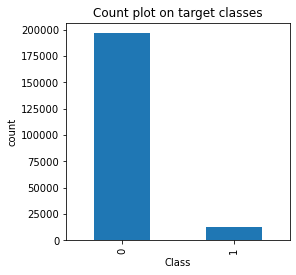

In [12]:
plt.figure(figsize=(4,4))
plt.title('Count plot on target classes')
train['income_above_limit'] = train['income_above_limit'].map({'Below limit':0, 'Above limit':1})
train['income_above_limit'].value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('count')
plt.show()

In [13]:
null_cols = pd.DataFrame(train.isnull().mean(), columns=['Missing_Perc'])
null_cols.reset_index(inplace=True)
null_cols['feature'] = null_cols['index']
null_cols.drop('index', axis=1, inplace=True)
cols_to_drop = null_cols[null_cols['Missing_Perc'] > 0.5]
cols_to_fill = null_cols[(null_cols['Missing_Perc'] <= 0.5) & (null_cols['Missing_Perc'] > 0)]

print(f"cols to drop as missing value % exceeds 50% \n\n {cols_to_drop}")
print('\n\n')
print(f"cols to handle missing values as missing value % less than 50% \n\n {cols_to_fill}")

cols to drop as missing value % exceeds 50% 

     Missing_Perc                       feature
4       0.502365                         class
5       0.936506           education_institute
10      0.968878           unemployment_reason
13      0.904157                is_labor_union
18      0.504508          occupation_code_main
22      0.723889               under_18_family
23      0.990052  veterans_admin_questionnaire
38      0.507325          residence_1_year_ago
39      0.921952             old_residence_reg
40      0.921952           old_residence_state



cols to handle missing values as missing value % less than 50% 

     Missing_Perc                         feature
34      0.007580    migration_code_change_in_msa
35      0.422207          migration_prev_sunbelt
36      0.007580  migration_code_move_within_reg
37      0.007580    migration_code_change_in_reg


In [14]:
cols_to_drop

,Missing_Perc,feature
4,0.502365,class
5,0.936506,education_institute
10,0.968878,unemployment_reason
13,0.904157,is_labor_union
18,0.504508,occupation_code_main
22,0.723889,under_18_family
23,0.990052,veterans_admin_questionnaire
38,0.507325,residence_1_year_ago
39,0.921952,old_residence_reg
40,0.921952,old_residence_state


### Test: null values

In [15]:
test_null_cols = pd.DataFrame(test.isnull().mean(), columns=['Missing_Perc'])
test_null_cols.reset_index(inplace=True)
test_null_cols['feature'] = test_null_cols['index']
test_null_cols.drop('index', axis=1, inplace=True)
test_cols_to_drop = test_null_cols[test_null_cols['Missing_Perc'] > 0.5]
test_cols_to_fill = test_null_cols[(test_null_cols['Missing_Perc'] <= 0.5) & (test_null_cols['Missing_Perc'] > 0)]

print(f"cols to drop as missing value % exceeds 50% \n\n {test_cols_to_drop}")
print('\n\n')
print(f"cols to handle missing values as missing value % less than 50% \n\n {test_cols_to_fill}")

cols to drop as missing value % exceeds 50% 

     Missing_Perc                       feature
4       0.502072                         class
5       0.937451           education_institute
10      0.970151           unemployment_reason
13      0.905731                is_labor_union
18      0.504232          occupation_code_main
22      0.723632               under_18_family
23      0.989675  veterans_admin_questionnaire
38      0.507841          residence_1_year_ago
39      0.920745             old_residence_reg
40      0.920745           old_residence_state



cols to handle missing values as missing value % less than 50% 

     Missing_Perc                         feature
34      0.007251    migration_code_change_in_msa
35      0.420155          migration_prev_sunbelt
36      0.007251  migration_code_move_within_reg
37      0.007251    migration_code_change_in_reg


* Train & test shows same features have same level of missing values

### Analyze further on the features cols_to_drop

In [16]:
cols_to_drop

,Missing_Perc,feature
4,0.502365,class
5,0.936506,education_institute
10,0.968878,unemployment_reason
13,0.904157,is_labor_union
18,0.504508,occupation_code_main
22,0.723889,under_18_family
23,0.990052,veterans_admin_questionnaire
38,0.507325,residence_1_year_ago
39,0.921952,old_residence_reg
40,0.921952,old_residence_state


<AxesSubplot:>

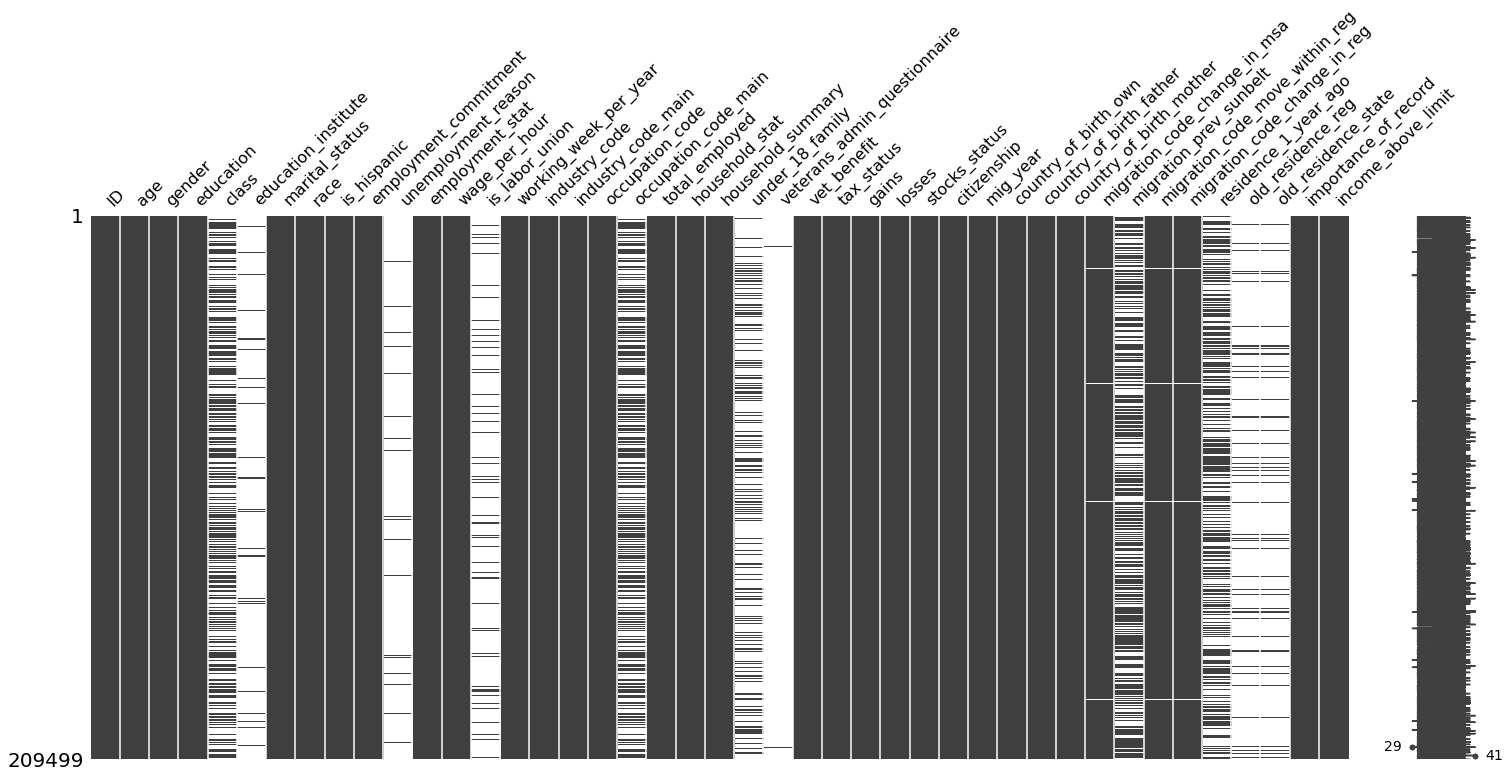

In [17]:
msno.matrix(train)

### Class

In [18]:
#class : Class Of Worker
train['class'].value_counts()

 Private                           75617
 Self-employed-not incorporated     8957
 Local government                   8093
 State government                   4480
 Self-employed-incorporated         3444
 Federal government                 3047
 Never worked                        449
 Without pay                         167
Name: class, dtype: int64

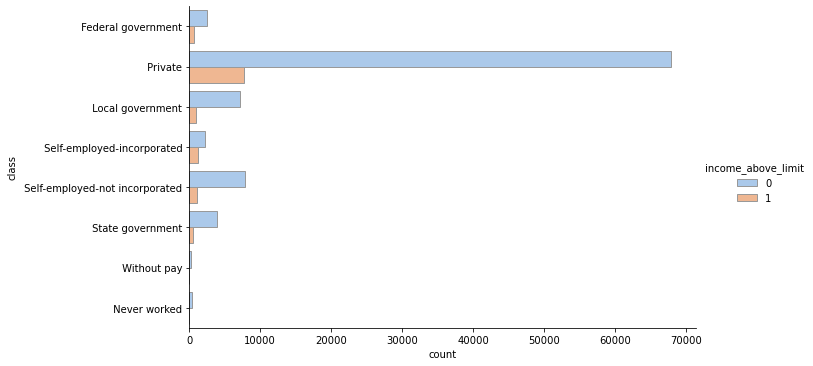

In [19]:
sns.catplot(
    data=train, y="class", hue="income_above_limit", kind="count", aspect=2,
    palette="pastel", edgecolor=".6",
)

In [20]:
for type in train['class'].value_counts().reset_index()['index']:
    print(f"**{type}**")
    val_count = train[train['class'] == type]['income_above_limit'].value_counts()
    ratio = val_count.iloc[1]/(val_count[0] + val_count[1])
    print(val_count)
    print(f"{type} --> Ratio of 1:0 in income_aboice_limit is {ratio}")
    print('\n')

** Private**
0    67919
1     7698
Name: income_above_limit, dtype: int64
 Private --> Ratio of 1:0 in income_aboice_limit is 0.10180250472777286


** Self-employed-not incorporated**
0    7812
1    1145
Name: income_above_limit, dtype: int64
 Self-employed-not incorporated --> Ratio of 1:0 in income_aboice_limit is 0.12783297979234118


** Local government**
0    7207
1     886
Name: income_above_limit, dtype: int64
 Local government --> Ratio of 1:0 in income_aboice_limit is 0.10947732608427035


** State government**
0    3951
1     529
Name: income_above_limit, dtype: int64
 State government --> Ratio of 1:0 in income_aboice_limit is 0.11808035714285714


** Self-employed-incorporated**
0    2247
1    1197
Name: income_above_limit, dtype: int64
 Self-employed-incorporated --> Ratio of 1:0 in income_aboice_limit is 0.3475609756097561


** Federal government**
0    2435
1     612
Name: income_above_limit, dtype: int64
 Federal government --> Ratio of 1:0 in income_aboice_limit is 0.2

* Self-employed-incorporated - 34% of people in this category have salary above limit
* Federal government - 20% of people of income above limit
<br>
* Not advisable to drop this feature


In [21]:
train['class'] = train['class'].fillna('Not available')
train['class'].value_counts()

Not available                      105245
 Private                            75617
 Self-employed-not incorporated      8957
 Local government                    8093
 State government                    4480
 Self-employed-incorporated          3444
 Federal government                  3047
 Never worked                         449
 Without pay                          167
Name: class, dtype: int64

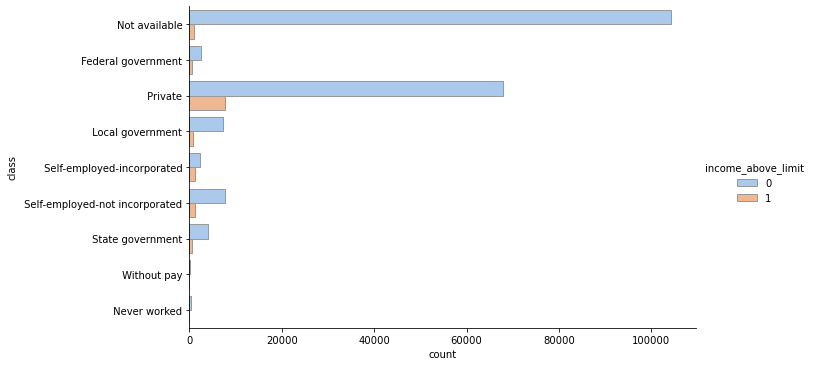

In [22]:
sns.catplot(
    data=train, y="class", hue="income_above_limit", kind="count", aspect=2,
    palette="pastel", edgecolor=".6",
)

In [23]:
for type in train['class'].value_counts().reset_index()['index']:
    print(f"**{type}**")
    val_count = train[train['class'] == type]['income_above_limit'].value_counts()
    ratio = val_count.iloc[1]/(val_count[0] + val_count[1])
    print(val_count)
    print(f"{type} --> Ratio of 1:0 in income_aboice_limit is {ratio}")
    print('\n')

**Not available**
0    104317
1       928
Name: income_above_limit, dtype: int64
Not available --> Ratio of 1:0 in income_aboice_limit is 0.00881752102237636


** Private**
0    67919
1     7698
Name: income_above_limit, dtype: int64
 Private --> Ratio of 1:0 in income_aboice_limit is 0.10180250472777286


** Self-employed-not incorporated**
0    7812
1    1145
Name: income_above_limit, dtype: int64
 Self-employed-not incorporated --> Ratio of 1:0 in income_aboice_limit is 0.12783297979234118


** Local government**
0    7207
1     886
Name: income_above_limit, dtype: int64
 Local government --> Ratio of 1:0 in income_aboice_limit is 0.10947732608427035


** State government**
0    3951
1     529
Name: income_above_limit, dtype: int64
 State government --> Ratio of 1:0 in income_aboice_limit is 0.11808035714285714


** Self-employed-incorporated**
0    2247
1    1197
Name: income_above_limit, dtype: int64
 Self-employed-incorporated --> Ratio of 1:0 in income_aboice_limit is 0.34756097

#### Handle missing values in Test dataset

In [24]:
test['class'] = test['class'].fillna('Not available')
test['class'].value_counts()

Not available                      45079
 Private                           32482
 Self-employed-not incorporated     3768
 Local government                   3524
 State government                   1914
 Self-employed-incorporated         1469
 Federal government                 1283
 Never worked                        194
 Without pay                          73
Name: class, dtype: int64

### education_institute

In [25]:
train['education_institute'].value_counts()

 High school              7247
 College or university    6055
Name: education_institute, dtype: int64

* Drop this as 90% more values not available

In [26]:
train.drop('education_institute', axis=1, inplace=True)

### Handle missing values in Test dataset

In [27]:
test.drop('education_institute', axis=1, inplace=True)

### unemployment_reason

In [28]:
train['unemployment_reason'].value_counts()

 Other job loser          2242
 Re-entrant               2154
 Job loser - on layoff    1050
 Job leaver                625
 New entrant               449
Name: unemployment_reason, dtype: int64

* Drop this as 90% more values not available

In [29]:
train.drop('unemployment_reason', axis=1, inplace=True)

### Handle missing values in Test dataset

In [30]:
test.drop('unemployment_reason', axis=1, inplace=True)

### is_labor_union

In [31]:
train['is_labor_union'].value_counts()

 No     16968
Same     3111
Name: is_labor_union, dtype: int64

* Drop this as 90% more values not available

In [32]:
train.drop('is_labor_union', axis=1, inplace=True)

### Handle missing values in Test dataset

In [33]:
test.drop('is_labor_union', axis=1, inplace=True)

### occupation_code_main

In [34]:
train['occupation_code_main'].value_counts()

 Adm support including clerical           15351
 Professional specialty                   14544
 Executive admin and managerial           13107
 Other service                            12856
 Sales                                    12487
 Precision production craft & repair      11207
 Machine operators assmblrs & inspctrs     6650
 Handlers equip cleaners etc               4340
 Transportation and material moving        4244
 Farming forestry and fishing              3273
 Technicians and related support           3136
 Protective services                       1700
 Private household services                 878
 Armed Forces                                32
Name: occupation_code_main, dtype: int64

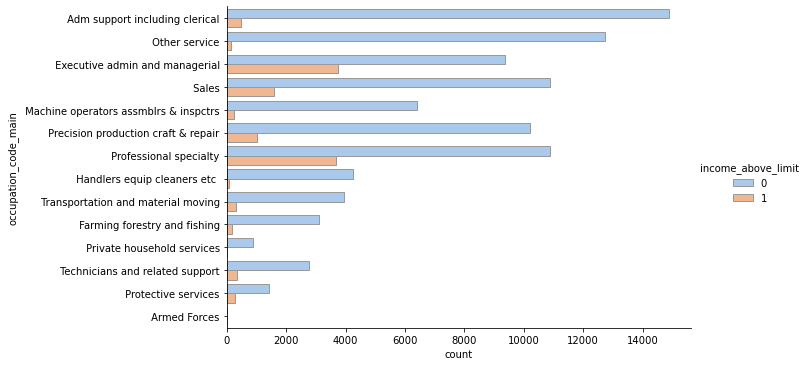

In [35]:
sns.catplot(
    data=train, y="occupation_code_main", hue="income_above_limit", kind="count", aspect=2,
    palette="pastel", edgecolor=".6",
)

In [36]:
for type in train['occupation_code_main'].value_counts().reset_index()['index']:
    print(f"**{type}**")
    val_count = train[train['occupation_code_main'] == type]['income_above_limit'].value_counts()
    ratio = val_count.iloc[1]/(val_count[0] + val_count[1])
    print(val_count)
    print(f"{type} --> Ratio of 1:0 in income_above_limit is {ratio}")
    print('\n')

** Adm support including clerical**
0    14882
1      469
Name: income_above_limit, dtype: int64
 Adm support including clerical --> Ratio of 1:0 in income_above_limit is 0.030551755585955312


** Professional specialty**
0    10867
1     3677
Name: income_above_limit, dtype: int64
 Professional specialty --> Ratio of 1:0 in income_above_limit is 0.2528190319031903


** Executive admin and managerial**
0    9354
1    3753
Name: income_above_limit, dtype: int64
 Executive admin and managerial --> Ratio of 1:0 in income_above_limit is 0.28633554589150834


** Other service**
0    12724
1      132
Name: income_above_limit, dtype: int64
 Other service --> Ratio of 1:0 in income_above_limit is 0.010267579340385812


** Sales**
0    10883
1     1604
Name: income_above_limit, dtype: int64
 Sales --> Ratio of 1:0 in income_above_limit is 0.12845359173540483


** Precision production craft & repair**
0    10199
1     1008
Name: income_above_limit, dtype: int64
 Precision production craft & repa

* Executive admin and managerial & Professional specialty: Have 25% people with income above limit
* Do not drop this feature
* create new category for NA records

In [37]:
train['occupation_code_main'] = train['occupation_code_main'].fillna('Not available')

In [38]:
train['occupation_code_main'].value_counts()

Not available                             105694
 Adm support including clerical            15351
 Professional specialty                    14544
 Executive admin and managerial            13107
 Other service                             12856
 Sales                                     12487
 Precision production craft & repair       11207
 Machine operators assmblrs & inspctrs      6650
 Handlers equip cleaners etc                4340
 Transportation and material moving         4244
 Farming forestry and fishing               3273
 Technicians and related support            3136
 Protective services                        1700
 Private household services                  878
 Armed Forces                                 32
Name: occupation_code_main, dtype: int64

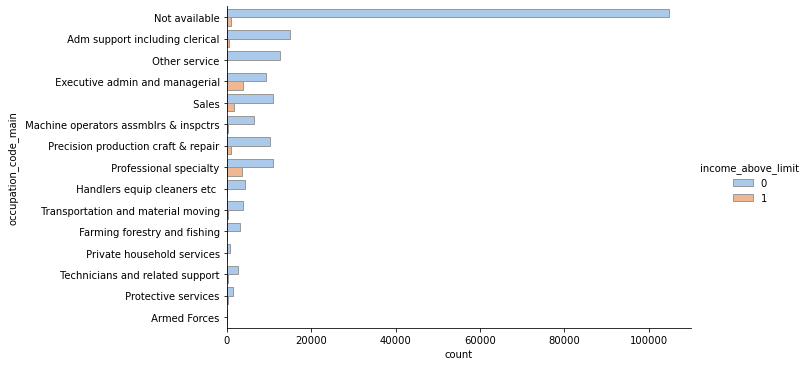

In [39]:
sns.catplot(
    data=train, y="occupation_code_main", hue="income_above_limit", kind="count", aspect=2,
    palette="pastel", edgecolor=".6",
)

In [40]:
for type in train['occupation_code_main'].value_counts().reset_index()['index']:
    print(f"**{type}**")
    val_count = train[train['occupation_code_main'] == type]['income_above_limit'].value_counts()
    ratio = val_count.iloc[1]/(val_count[0] + val_count[1])
    print(val_count)
    print(f"{type} --> Ratio of 1:0 in income_above_limit is {ratio}")
    print('\n')

**Not available**
0    104764
1       930
Name: income_above_limit, dtype: int64
Not available --> Ratio of 1:0 in income_above_limit is 0.008798985751319847


** Adm support including clerical**
0    14882
1      469
Name: income_above_limit, dtype: int64
 Adm support including clerical --> Ratio of 1:0 in income_above_limit is 0.030551755585955312


** Professional specialty**
0    10867
1     3677
Name: income_above_limit, dtype: int64
 Professional specialty --> Ratio of 1:0 in income_above_limit is 0.2528190319031903


** Executive admin and managerial**
0    9354
1    3753
Name: income_above_limit, dtype: int64
 Executive admin and managerial --> Ratio of 1:0 in income_above_limit is 0.28633554589150834


** Other service**
0    12724
1      132
Name: income_above_limit, dtype: int64
 Other service --> Ratio of 1:0 in income_above_limit is 0.010267579340385812


** Sales**
0    10883
1     1604
Name: income_above_limit, dtype: int64
 Sales --> Ratio of 1:0 in income_above_limit i

#### Handle missing values in Test dataset

In [41]:
test['occupation_code_main'] = test['occupation_code_main'].fillna('Not available')

In [42]:
test['occupation_code_main'].value_counts()

Not available                             45273
 Adm support including clerical            6738
 Professional specialty                    6265
 Executive admin and managerial            5676
 Other service                             5420
 Sales                                     5317
 Precision production craft & repair       4665
 Machine operators assmblrs & inspctrs     2915
 Handlers equip cleaners etc               1858
 Transportation and material moving        1816
 Farming forestry and fishing              1393
 Technicians and related support           1354
 Protective services                        748
 Private household services                 328
 Armed Forces                                20
Name: occupation_code_main, dtype: int64

### under_18_family

In [43]:
train['under_18_family'].value_counts()

 Both parents present      40875
 Mother only present       13266
 Father only present        1962
 Neither parent present     1742
Name: under_18_family, dtype: int64

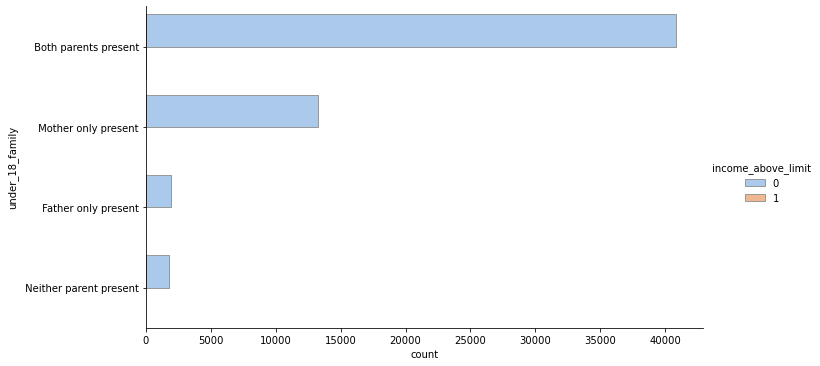

In [44]:
sns.catplot(
    data=train, y="under_18_family", hue="income_above_limit", kind="count", aspect=2,
    palette="pastel", edgecolor=".6",
)

In [45]:
for type in train['under_18_family'].value_counts().reset_index()['index']:
    print(f"**{type}**")
    val_count = train[train['under_18_family'] == type]['income_above_limit'].value_counts()
    try:
        ratio = val_count.iloc[1]/(val_count[0] + val_count[1])
    except Exception as e:
        print(e)
    print(val_count)
    print(f"{type} --> Ratio of 1:0 in income_above_limit is {ratio}")
    print('\n')

** Both parents present**
0    40873
1        2
Name: income_above_limit, dtype: int64
 Both parents present --> Ratio of 1:0 in income_above_limit is 4.892966360856269e-05


** Mother only present**
single positional indexer is out-of-bounds
0    13266
Name: income_above_limit, dtype: int64
 Mother only present --> Ratio of 1:0 in income_above_limit is 4.892966360856269e-05


** Father only present**
single positional indexer is out-of-bounds
0    1962
Name: income_above_limit, dtype: int64
 Father only present --> Ratio of 1:0 in income_above_limit is 4.892966360856269e-05


** Neither parent present**
single positional indexer is out-of-bounds
0    1742
Name: income_above_limit, dtype: int64
 Neither parent present --> Ratio of 1:0 in income_above_limit is 4.892966360856269e-05




* Not much of variance in thie variable
* drop this feature

In [46]:
train.drop('under_18_family', axis=1, inplace=True)

### Handle missing values in Test dataset

In [47]:
test.drop('under_18_family', axis=1, inplace=True)

#### veterans_admin_questionnaire, old_residence_reg & old_residence_state

In [48]:
print(train['veterans_admin_questionnaire'].value_counts())
print('\n')
print(train['old_residence_reg'].value_counts())
print('\n')
print(train['old_residence_state'].value_counts())

 No     1684
Same     400
Name: veterans_admin_questionnaire, dtype: int64


 South        5056
 West         4296
 Midwest      3691
 Northeast    2810
 Abroad        498
Name: old_residence_reg, dtype: int64


 California              1849
 Utah                    1104
 Florida                  905
 North Carolina           836
 ?                        741
 Abroad                   635
 Oklahoma                 633
 Minnesota                620
 Indiana                  565
 North Dakota             510
 New Mexico               478
 Michigan                 443
 Alaska                   284
 Arizona                  277
 Kentucky                 263
 New Hampshire            252
 Colorado                 251
 Oregon                   247
 Wyoming                  245
 Georgia                  236
 West Virginia            234
 Ohio                     229
 Montana                  225
 Alabama                  221
 Texas                    213
 Arkansas                 212
 New Yor

* since above three features have more than 90% missing values, lets drop the three features

In [49]:
train.drop(['veterans_admin_questionnaire', 'old_residence_reg', 'old_residence_state'], axis=1, inplace=True)

#### Handle missing values in Test dataset

In [50]:
test.drop(['veterans_admin_questionnaire', 'old_residence_reg', 'old_residence_state'], axis=1, inplace=True)

### residence_1_year_ago

In [51]:
train['residence_1_year_ago'].value_counts()

Same    86864
 No     16351
Name: residence_1_year_ago, dtype: int64

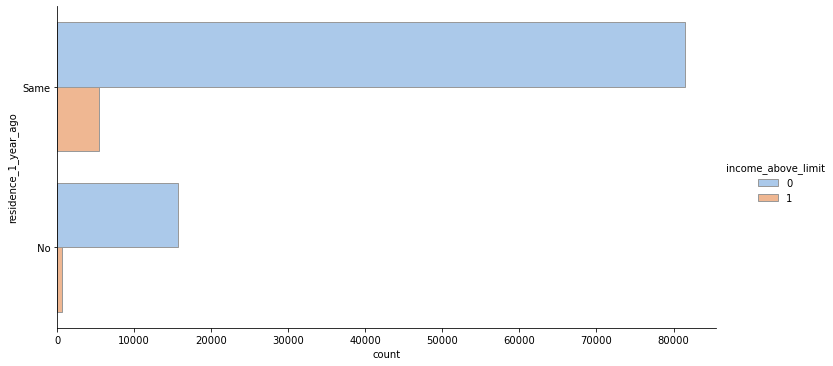

In [52]:
sns.catplot(
    data=train, y="residence_1_year_ago", hue="income_above_limit", kind="count", aspect=2,
    palette="pastel", edgecolor=".6",
)

In [53]:
for type in train['residence_1_year_ago'].value_counts().reset_index()['index']:
    print(f"**{type}**")
    val_count = train[train['residence_1_year_ago'] == type]['income_above_limit'].value_counts()
    try:
        ratio = val_count.iloc[1]/(val_count[0] + val_count[1])
    except Exception as e:
        print(e)
    print(val_count)
    print(f"{type} --> Ratio of 1:0 in income_above_limit is {ratio}")
    print('\n')

**Same**
0    81468
1     5396
Name: income_above_limit, dtype: int64
Same --> Ratio of 1:0 in income_above_limit is 0.06212009578191195


** No**
0    15681
1      670
Name: income_above_limit, dtype: int64
 No --> Ratio of 1:0 in income_above_limit is 0.04097608708947465




* 50% missing values
* Not much of variance also
* Drop this feature

In [54]:
train.drop('residence_1_year_ago', axis=1, inplace=True)

#### Handle missing values in Test dataset

In [55]:
test.drop('residence_1_year_ago', axis=1, inplace=True)

In [56]:
cols_to_fill

,Missing_Perc,feature
34,0.007580,migration_code_change_in_msa
35,0.422207,migration_prev_sunbelt
36,0.007580,migration_code_move_within_reg
37,0.007580,migration_code_change_in_reg


### migration_code_change_in_msa

In [57]:
train['migration_code_change_in_msa'].value_counts()

 ?                   104696
unchanged             86864
 MSA to MSA           11096
 NonMSA to nonMSA      2903
 MSA to nonMSA          778
 NonMSA to MSA          642
 Not identifiable       436
 Abroad to MSA          417
 Abroad to nonMSA        79
Name: migration_code_change_in_msa, dtype: int64

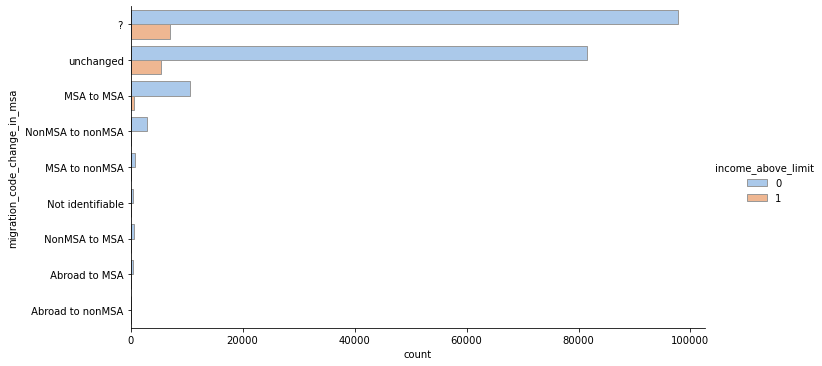

In [58]:
sns.catplot(
    data=train, y="migration_code_change_in_msa", hue="income_above_limit", kind="count", aspect=2,
    palette="pastel", edgecolor=".6",
)

In [59]:
for type in train['migration_code_change_in_msa'].value_counts().reset_index()['index']:
    print(f"**{type}**")
    val_count = train[train['migration_code_change_in_msa'] == type]['income_above_limit'].value_counts()
    try:
        ratio = val_count.iloc[1]/(val_count[0] + val_count[1])
    except Exception as e:
        print(e)
    print(val_count)
    print(f"{type} --> Ratio of 1:0 in income_above_limit is {ratio}")
    print('\n')

** ?**
0    97764
1     6932
Name: income_above_limit, dtype: int64
 ? --> Ratio of 1:0 in income_above_limit is 0.06621074348590204


**unchanged**
0    81468
1     5396
Name: income_above_limit, dtype: int64
unchanged --> Ratio of 1:0 in income_above_limit is 0.06212009578191195


** MSA to MSA**
0    10549
1      547
Name: income_above_limit, dtype: int64
 MSA to MSA --> Ratio of 1:0 in income_above_limit is 0.04929704397981254


** NonMSA to nonMSA**
0    2856
1      47
Name: income_above_limit, dtype: int64
 NonMSA to nonMSA --> Ratio of 1:0 in income_above_limit is 0.01619014812263176


** MSA to nonMSA**
0    757
1     21
Name: income_above_limit, dtype: int64
 MSA to nonMSA --> Ratio of 1:0 in income_above_limit is 0.02699228791773779


** NonMSA to MSA**
0    620
1     22
Name: income_above_limit, dtype: int64
 NonMSA to MSA --> Ratio of 1:0 in income_above_limit is 0.03426791277258567


** Not identifiable**
0    421
1     15
Name: income_above_limit, dtype: int64
 Not identi

* Not much of variance seen
* substitue the missing values with ?

In [60]:
train['migration_code_change_in_msa'] = train['migration_code_change_in_msa'].fillna(' ?')

In [61]:
train['migration_code_change_in_msa'].value_counts()

 ?                   106284
unchanged             86864
 MSA to MSA           11096
 NonMSA to nonMSA      2903
 MSA to nonMSA          778
 NonMSA to MSA          642
 Not identifiable       436
 Abroad to MSA          417
 Abroad to nonMSA        79
Name: migration_code_change_in_msa, dtype: int64

#### Handle missing values in Test dataset

In [62]:
test['migration_code_change_in_msa'].value_counts()

 ?                   44946
unchanged            37073
 MSA to MSA           4794
 NonMSA to nonMSA     1252
 MSA to nonMSA         376
 NonMSA to MSA         268
 Abroad to MSA         202
 Not identifiable      194
 Abroad to nonMSA       30
Name: migration_code_change_in_msa, dtype: int64

In [63]:
test['migration_code_change_in_msa'] = test['migration_code_change_in_msa'].fillna(' ?')

### migration_prev_sunbelt

In [64]:
train['migration_prev_sunbelt'].value_counts()

 ?      104696
 No      10298
Same      6053
Name: migration_prev_sunbelt, dtype: int64

* 42% values are missing - substitue with ?

In [65]:
train['migration_prev_sunbelt']=train['migration_prev_sunbelt'].fillna('?')

#### Handle missing values in Test dataset

In [66]:
test['migration_prev_sunbelt'].value_counts()

 ?      44946
 No      4500
Same     2616
Name: migration_prev_sunbelt, dtype: int64

In [67]:
test['migration_prev_sunbelt']=test['migration_prev_sunbelt'].fillna('?')

### migration_code_move_within_reg

In [68]:
train['migration_code_move_within_reg'].value_counts()

 ?                               104696
unchanged                         86864
 Same county                      10196
 Different county same state       2946
 Different state in South          1003
 Different state in West            735
 Different state in Midwest         560
 Abroad                             498
 Different state in Northeast       413
Name: migration_code_move_within_reg, dtype: int64

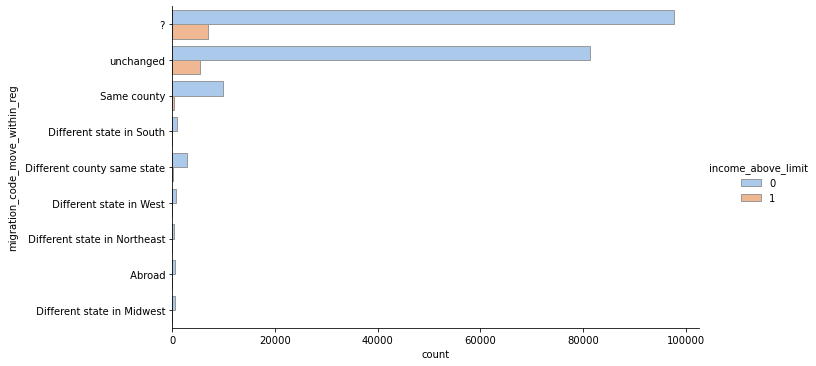

In [69]:
sns.catplot(
    data=train, y="migration_code_move_within_reg", hue="income_above_limit", kind="count", aspect=2,
    palette="pastel", edgecolor=".6",
)

In [70]:
for type in train['migration_code_move_within_reg'].value_counts().reset_index()['index']:
    print(f"**{type}**")
    val_count = train[train['migration_code_move_within_reg'] == type]['income_above_limit'].value_counts()
    try:
        ratio = val_count.iloc[1]/(val_count[0] + val_count[1])
    except Exception as e:
        print(e)
    print(val_count)
    print(f"{type} --> Ratio of 1:0 in income_above_limit is {ratio}")
    print('\n')

** ?**
0    97764
1     6932
Name: income_above_limit, dtype: int64
 ? --> Ratio of 1:0 in income_above_limit is 0.06621074348590204


**unchanged**
0    81468
1     5396
Name: income_above_limit, dtype: int64
unchanged --> Ratio of 1:0 in income_above_limit is 0.06212009578191195


** Same county**
0    9840
1     356
Name: income_above_limit, dtype: int64
 Same county --> Ratio of 1:0 in income_above_limit is 0.03491565319733229


** Different county same state**
0    2798
1     148
Name: income_above_limit, dtype: int64
 Different county same state --> Ratio of 1:0 in income_above_limit is 0.05023761031907671


** Different state in South**
0    951
1     52
Name: income_above_limit, dtype: int64
 Different state in South --> Ratio of 1:0 in income_above_limit is 0.0518444666001994


** Different state in West**
0    699
1     36
Name: income_above_limit, dtype: int64
 Different state in West --> Ratio of 1:0 in income_above_limit is 0.04897959183673469


** Different state in Midwe

* Not much of variance seen
* susbtiture missing with ?

In [71]:
train['migration_code_move_within_reg'] = train['migration_code_move_within_reg'].fillna(' ?')

#### Handle missing values in Test dataset

In [72]:
test['migration_code_move_within_reg'].value_counts()

 ?                               44946
unchanged                        37073
 Same county                      4495
 Different county same state      1180
 Different state in South          445
 Different state in West           302
 Abroad                            235
 Different state in Midwest        233
 Different state in Northeast      226
Name: migration_code_move_within_reg, dtype: int64

In [73]:
test['migration_code_move_within_reg'] = test['migration_code_move_within_reg'].fillna(' ?')

### migration_code_change_in_reg

In [74]:
train['migration_code_change_in_reg'].value_counts()

 ?                                 104696
unchanged                           86864
 Same county                        10196
 Different county same state         2946
 Different region                    1206
 Different state same division       1018
 Abroad                               498
 Different division same region       487
Name: migration_code_change_in_reg, dtype: int64

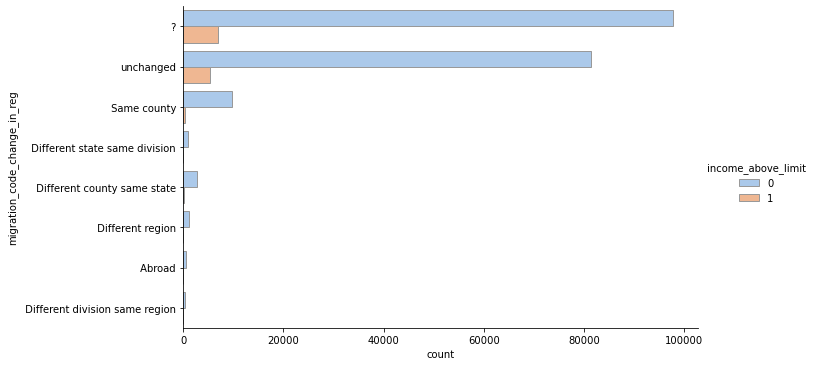

In [75]:
sns.catplot(
    data=train, y="migration_code_change_in_reg", hue="income_above_limit", kind="count", aspect=2,
    palette="pastel", edgecolor=".6",
)

In [76]:
for type in train['migration_code_change_in_reg'].value_counts().reset_index()['index']:
    print(f"**{type}**")
    val_count = train[train['migration_code_change_in_reg'] == type]['income_above_limit'].value_counts()
    try:
        ratio = val_count.iloc[1]/(val_count[0] + val_count[1])
    except Exception as e:
        print(e)
    print(val_count)
    print(f"{type} --> Ratio of 1:0 in income_above_limit is {ratio}")
    print('\n')

** ?**
0    97764
1     6932
Name: income_above_limit, dtype: int64
 ? --> Ratio of 1:0 in income_above_limit is 0.06621074348590204


**unchanged**
0    81468
1     5396
Name: income_above_limit, dtype: int64
unchanged --> Ratio of 1:0 in income_above_limit is 0.06212009578191195


** Same county**
0    9840
1     356
Name: income_above_limit, dtype: int64
 Same county --> Ratio of 1:0 in income_above_limit is 0.03491565319733229


** Different county same state**
0    2798
1     148
Name: income_above_limit, dtype: int64
 Different county same state --> Ratio of 1:0 in income_above_limit is 0.05023761031907671


** Different region**
0    1133
1      73
Name: income_above_limit, dtype: int64
 Different region --> Ratio of 1:0 in income_above_limit is 0.06053067993366501


** Different state same division**
0    971
1     47
Name: income_above_limit, dtype: int64
 Different state same division --> Ratio of 1:0 in income_above_limit is 0.04616895874263261


** Abroad**
0    480
1     1

* Not much of significance is seen
* replace missing with ?

In [77]:
train['migration_code_change_in_reg'] = train['migration_code_change_in_reg'].fillna(' ?')

#### Handle missing values in Test dataset

In [78]:
test['migration_code_change_in_reg'] = test['migration_code_change_in_reg'].fillna(' ?')

In [79]:
train.isnull().mean()

ID                                0.0
age                               0.0
gender                            0.0
education                         0.0
class                             0.0
marital_status                    0.0
race                              0.0
is_hispanic                       0.0
employment_commitment             0.0
employment_stat                   0.0
wage_per_hour                     0.0
working_week_per_year             0.0
industry_code                     0.0
industry_code_main                0.0
occupation_code                   0.0
occupation_code_main              0.0
total_employed                    0.0
household_stat                    0.0
household_summary                 0.0
vet_benefit                       0.0
tax_status                        0.0
gains                             0.0
losses                            0.0
stocks_status                     0.0
citizenship                       0.0
mig_year                          0.0
country_of_b

* All missing values have been handled

In [80]:
test.isnull().mean()

ID                                0.0
age                               0.0
gender                            0.0
education                         0.0
class                             0.0
marital_status                    0.0
race                              0.0
is_hispanic                       0.0
employment_commitment             0.0
employment_stat                   0.0
wage_per_hour                     0.0
working_week_per_year             0.0
industry_code                     0.0
industry_code_main                0.0
occupation_code                   0.0
occupation_code_main              0.0
total_employed                    0.0
household_stat                    0.0
household_summary                 0.0
vet_benefit                       0.0
tax_status                        0.0
gains                             0.0
losses                            0.0
stocks_status                     0.0
citizenship                       0.0
mig_year                          0.0
country_of_b

In [81]:
train['ID'].nunique()

209499

* ID values - drop the feature ID

In [82]:
train.drop('ID', axis=1, inplace=True)

In [83]:
test.drop('ID', axis=1, inplace=True)

In [84]:
train.head()

,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,...,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,importance_of_record,income_above_limit
0,79,Female,High school graduate,Not available,Widowed,White,All other,Not in labor force,0,0,...,95,US,US,US,?,?,?,?,1779.74,0
1,65,Female,High school graduate,Not available,Widowed,White,All other,Children or Armed Forces,0,0,...,94,US,US,US,unchanged,?,unchanged,unchanged,2366.75,0
2,21,Male,12th grade no diploma,Federal government,Never married,Black,All other,Children or Armed Forces,0,500,...,94,US,US,US,unchanged,?,unchanged,unchanged,1693.42,0
3,2,Female,Children,Not available,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,0,0,...,94,US,India,India,unchanged,?,unchanged,unchanged,1380.27,0
4,70,Male,High school graduate,Not available,Married-civilian spouse present,White,All other,Not in labor force,0,0,...,95,US,US,US,?,?,?,?,1580.79,0


In [85]:
test.head()

,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,...,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,importance_of_record
0,54,Male,High school graduate,Private,Married-civilian spouse present,White,All other,Children or Armed Forces,0,600,...,Native,94,US,US,US,unchanged,?,unchanged,unchanged,3388.96
1,53,Male,5th or 6th grade,Private,Married-civilian spouse present,White,Central or South American,Full-time schedules,0,0,...,Foreign born- Not a citizen of U S,95,El-Salvador,El-Salvador,El-Salvador,?,?,?,?,1177.55
2,42,Male,Bachelors degree(BA AB BS),Private,Married-civilian spouse present,White,All other,Full-time schedules,1,0,...,Native,95,US,US,US,?,?,?,?,4898.55
3,16,Female,9th grade,Not available,Never married,White,All other,Children or Armed Forces,0,0,...,Native,94,US,US,US,unchanged,?,unchanged,unchanged,1391.44
4,16,Male,9th grade,Not available,Never married,White,All other,Not in labor force,0,0,...,Native,95,US,US,US,?,?,?,?,1933.18


In [86]:
### Numeric columns
int_cols = train.select_dtypes(include=['int64', 'float']).columns
obj_cols = train.select_dtypes(include='O').columns

print(int_cols)
print('\n')
print(obj_cols)

Index(['age', 'employment_stat', 'wage_per_hour', 'working_week_per_year',
       'industry_code', 'occupation_code', 'total_employed', 'vet_benefit',
       'gains', 'losses', 'stocks_status', 'mig_year', 'importance_of_record',
       'income_above_limit'],
      dtype='object')


Index(['gender', 'education', 'class', 'marital_status', 'race', 'is_hispanic',
       'employment_commitment', 'industry_code_main', 'occupation_code_main',
       'household_stat', 'household_summary', 'tax_status', 'citizenship',
       'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg'],
      dtype='object')


In [87]:
pd.get_dummies(train, columns=obj_cols)

,age,employment_stat,wage_per_hour,working_week_per_year,industry_code,occupation_code,total_employed,vet_benefit,gains,losses,...,migration_code_move_within_reg_ Same county,migration_code_move_within_reg_unchanged,migration_code_change_in_reg_ ?,migration_code_change_in_reg_ Abroad,migration_code_change_in_reg_ Different county same state,migration_code_change_in_reg_ Different division same region,migration_code_change_in_reg_ Different region,migration_code_change_in_reg_ Different state same division,migration_code_change_in_reg_ Same county,migration_code_change_in_reg_unchanged
0,79,0,0,52,0,0,2,2,0,0,...,0,0,1,0,0,0,0,0,0,0
1,65,0,0,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,0,0,1
2,21,0,500,15,41,26,4,2,0,0,...,0,1,0,0,0,0,0,0,0,1
3,2,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,70,0,0,0,0,0,0,2,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,16,0,0,0,0,0,0,2,0,0,...,0,0,1,0,0,0,0,0,0,0
209495,78,0,0,0,0,0,0,2,0,0,...,0,0,1,0,0,0,0,0,0,0
209496,8,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
209497,26,0,700,52,32,42,4,2,0,0,...,0,1,0,0,0,0,0,0,0,1


In [88]:
train[obj_cols].describe()

,gender,education,class,marital_status,race,is_hispanic,employment_commitment,industry_code_main,occupation_code_main,household_stat,household_summary,tax_status,citizenship,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg
count,209499,209499,209499,209499,209499,209499,209499,209499,209499,209499,209499,209499,209499,209499,209499,209499,209499,209499,209499,209499
unique,2,17,9,7,5,10,8,24,15,38,8,6,5,43,43,43,9,4,9,8
top,Female,High school graduate,Not available,Never married,White,All other,Children or Armed Forces,Not in universe or children,Not available,Householder,Householder,Nonfiler,Native,US,US,US,?,?,?,?
freq,108784,50627,105245,90723,175709,180404,129789,105694,105694,56195,79470,78671,185669,185666,166968,168233,106284,104696,106284,106284


#### gender

In [89]:
train['education'].value_counts()

 High school graduate                      50627
 Children                                  49685
 Some college but no degree                29320
 Bachelors degree(BA AB BS)                20979
 7th and 8th grade                          8438
 10th grade                                 7905
 11th grade                                 7260
 Masters degree(MA MS MEng MEd MSW MBA)     6861
 9th grade                                  6540
 Associates degree-occup /vocational        5650
 Associates degree-academic program         4494
 5th or 6th grade                           3542
 12th grade no diploma                      2282
 1st 2nd 3rd or 4th grade                   1917
 Prof school degree (MD DDS DVM LLB JD)     1852
 Doctorate degree(PhD EdD)                  1318
 Less than 1st grade                         829
Name: education, dtype: int64

In [90]:
#gender - nominal variable - no order is maintained - apply ohe

train = pd.get_dummies(train, columns=['gender'], drop_first=True)

In [91]:
train.columns

Index(['age', 'education', 'class', 'marital_status', 'race', 'is_hispanic',
       'employment_commitment', 'employment_stat', 'wage_per_hour',
       'working_week_per_year', 'industry_code', 'industry_code_main',
       'occupation_code', 'occupation_code_main', 'total_employed',
       'household_stat', 'household_summary', 'vet_benefit', 'tax_status',
       'gains', 'losses', 'stocks_status', 'citizenship', 'mig_year',
       'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'importance_of_record',
       'income_above_limit', 'gender_ Male'],
      dtype='object')

In [92]:
test = pd.get_dummies(test, columns=['gender'], drop_first=True)

In [93]:
test.columns

Index(['age', 'education', 'class', 'marital_status', 'race', 'is_hispanic',
       'employment_commitment', 'employment_stat', 'wage_per_hour',
       'working_week_per_year', 'industry_code', 'industry_code_main',
       'occupation_code', 'occupation_code_main', 'total_employed',
       'household_stat', 'household_summary', 'vet_benefit', 'tax_status',
       'gains', 'losses', 'stocks_status', 'citizenship', 'mig_year',
       'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'importance_of_record', 'gender_ Male'],
      dtype='object')

#### education

In [94]:
# education - inherent order is maintained
train['education'].value_counts()

 High school graduate                      50627
 Children                                  49685
 Some college but no degree                29320
 Bachelors degree(BA AB BS)                20979
 7th and 8th grade                          8438
 10th grade                                 7905
 11th grade                                 7260
 Masters degree(MA MS MEng MEd MSW MBA)     6861
 9th grade                                  6540
 Associates degree-occup /vocational        5650
 Associates degree-academic program         4494
 5th or 6th grade                           3542
 12th grade no diploma                      2282
 1st 2nd 3rd or 4th grade                   1917
 Prof school degree (MD DDS DVM LLB JD)     1852
 Doctorate degree(PhD EdD)                  1318
 Less than 1st grade                         829
Name: education, dtype: int64

In [95]:
test['education'].value_counts()

 High school graduate                      21927
 Children                                  21179
 Some college but no degree                12454
 Bachelors degree(BA AB BS)                 8771
 7th and 8th grade                          3718
 10th grade                                 3465
 11th grade                                 3139
 Masters degree(MA MS MEng MEd MSW MBA)     2986
 9th grade                                  2795
 Associates degree-occup /vocational        2398
 Associates degree-academic program         1948
 5th or 6th grade                           1449
 12th grade no diploma                       981
 Prof school degree (MD DDS DVM LLB JD)      817
 1st 2nd 3rd or 4th grade                    788
 Doctorate degree(PhD EdD)                   565
 Less than 1st grade                         406
Name: education, dtype: int64

In [96]:
edu_dict={
" Children":1,
" Less than 1st grade":2,
" 1st 2nd 3rd or 4th grade":3,
" 5th or 6th grade":4,
" 7th and 8th grade":5,
" 9th grade":6,
" 10th grade":7,
" 11th grade":8,
" 12th grade no diploma":9,
" High school graduate":10,
" Some college but no degree":11,
" Associates degree-occup /vocational":12,
" Associates degree-academic program":13,
" Bachelors degree(BA AB BS)":14,
" Prof school degree (MD DDS DVM LLB JD)":15,
" Masters degree(MA MS MEng MEd MSW MBA)":16,
" Doctorate degree(PhD EdD)":17
    }

In [97]:
train['education'] = train['education'].map(edu_dict)

* Inherent ordinality is present in education level - so label encoded in the order

In [98]:
test['education'] = test['education'].map(edu_dict)

#### class

In [99]:
train['class'].unique()

array(['Not available', ' Federal government', ' Private',
       ' Local government', ' Self-employed-incorporated',
       ' Self-employed-not incorporated', ' State government',
       ' Without pay', ' Never worked'], dtype=object)

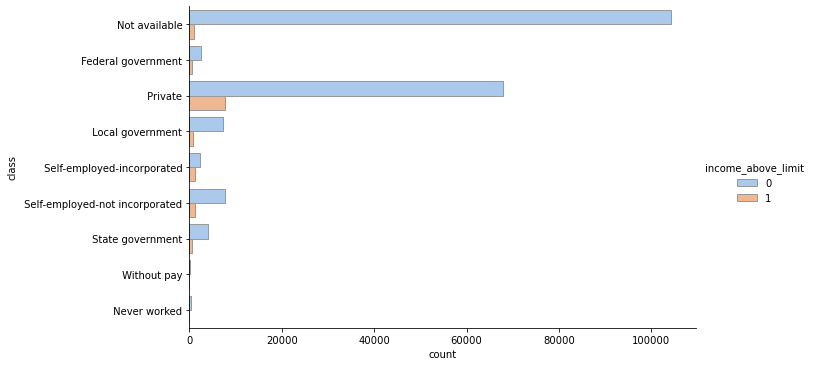

In [100]:
sns.catplot(
    data=train, y="class", hue="income_above_limit", kind="count", aspect=2,
    palette="pastel", edgecolor=".6",
)

In [101]:
for type in train['class'].value_counts().reset_index()['index']:
    print(f"**{type}**")
    val_count = train[train['class'] == type]['income_above_limit'].value_counts()
    try:
        ratio = val_count.iloc[1]/(val_count[0] + val_count[1])
    except Exception as e:
        print(e)
    print(val_count)
    print(f"{type} --> Ratio of 1:0 in income_above_limit is {ratio}")
    print('\n')

**Not available**
0    104317
1       928
Name: income_above_limit, dtype: int64
Not available --> Ratio of 1:0 in income_above_limit is 0.00881752102237636


** Private**
0    67919
1     7698
Name: income_above_limit, dtype: int64
 Private --> Ratio of 1:0 in income_above_limit is 0.10180250472777286


** Self-employed-not incorporated**
0    7812
1    1145
Name: income_above_limit, dtype: int64
 Self-employed-not incorporated --> Ratio of 1:0 in income_above_limit is 0.12783297979234118


** Local government**
0    7207
1     886
Name: income_above_limit, dtype: int64
 Local government --> Ratio of 1:0 in income_above_limit is 0.10947732608427035


** State government**
0    3951
1     529
Name: income_above_limit, dtype: int64
 State government --> Ratio of 1:0 in income_above_limit is 0.11808035714285714


** Self-employed-incorporated**
0    2247
1    1197
Name: income_above_limit, dtype: int64
 Self-employed-incorporated --> Ratio of 1:0 in income_above_limit is 0.34756097560975

In [102]:
class_dict={
" Never worked":1,
" Without pay":2,
"Not available":3,
" Private":4,
" Local government":5,
" State government":6,
" Self-employed-not incorporated":7,
" Federal government":8,
" Self-employed-incorporated":9
    }

In [103]:
train['class'] = train['class'].map(class_dict)

* Few class as more people with income above limit & vice-versa - as per the ratio, label encoding has been performed

In [104]:
test['class'] = test['class'].map(class_dict)

### marital_status

In [105]:
train['marital_status'].unique()

array([' Widowed', ' Never married', ' Married-civilian spouse present',
       ' Divorced', ' Married-spouse absent', ' Separated',
       ' Married-A F spouse present'], dtype=object)

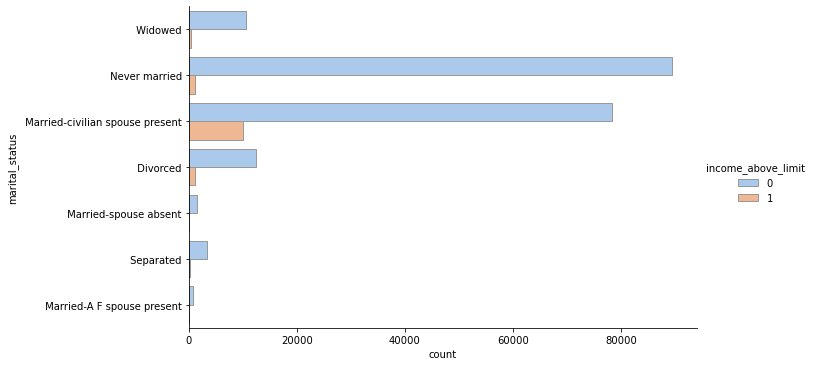

In [106]:
sns.catplot(data=train, y='marital_status', hue='income_above_limit',
           kind="count", aspect=2,palette="pastel", edgecolor=".6",)

In [107]:
for type in train['marital_status'].value_counts().reset_index()['index']:
    print(f"**{type}**")
    val_count = train[train['marital_status'] == type]['income_above_limit'].value_counts()
    try:
        ratio = val_count.iloc[1]/(val_count[0] + val_count[1])
    except Exception as e:
        print(e)
    print(val_count)
    print(f"{type} --> Ratio of 1:0 in income_above_limit is {ratio}")
    print('\n')

** Never married**
0    89553
1     1170
Name: income_above_limit, dtype: int64
 Never married --> Ratio of 1:0 in income_above_limit is 0.012896398928606858


** Married-civilian spouse present**
0    78313
1    10094
Name: income_above_limit, dtype: int64
 Married-civilian spouse present --> Ratio of 1:0 in income_above_limit is 0.11417647923806938


** Divorced**
0    12361
1     1095
Name: income_above_limit, dtype: int64
 Divorced --> Ratio of 1:0 in income_above_limit is 0.08137633769322235


** Widowed**
0    10664
1      365
Name: income_above_limit, dtype: int64
 Widowed --> Ratio of 1:0 in income_above_limit is 0.03309456886390425


** Separated**
0    3439
1     157
Name: income_above_limit, dtype: int64
 Separated --> Ratio of 1:0 in income_above_limit is 0.043659621802002224


** Married-spouse absent**
0    1464
1     104
Name: income_above_limit, dtype: int64
 Married-spouse absent --> Ratio of 1:0 in income_above_limit is 0.0663265306122449


** Married-A F spouse prese

* Might be indirectly independent on the age factor
* Married-civilian spouse present & divorced has more people with higher income above limit
* Label encode 

In [108]:
married_stat_dict = {
' Married-A F spouse present':1,
' Never married':2,
' Widowed':3,
' Separated':4,
' Married-spouse absent':5,
' Divorced':6,
' Married-civilian spouse present':7
    }


In [109]:
train['marital_status']=train['marital_status'].map(married_stat_dict)

In [110]:
test['marital_status']=test['marital_status'].map(married_stat_dict)

### race

In [111]:
train['race'].unique()

array([' White', ' Black', ' Asian or Pacific Islander',
       ' Amer Indian Aleut or Eskimo', ' Other'], dtype=object)

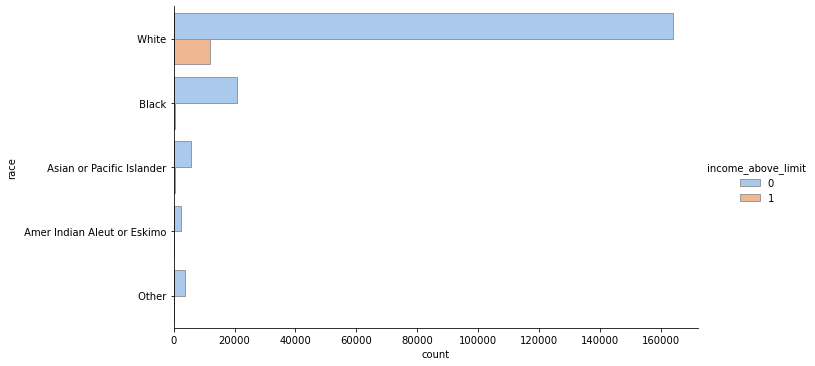

In [112]:
sns.catplot(data=train, y='race', hue='income_above_limit',
           kind="count", aspect=2,palette="pastel", edgecolor=".6",)

In [113]:
for type in train['race'].value_counts().reset_index()['index']:
    print(f"**{type}**")
    val_count = train[train['race'] == type]['income_above_limit'].value_counts()
    try:
        ratio = val_count.iloc[1]/(val_count[0] + val_count[1])
    except Exception as e:
        print(e)
    print(val_count)
    print(f"{type} --> Ratio of 1:0 in income_above_limit is {ratio}")
    print('\n')

** White**
0    163871
1     11838
Name: income_above_limit, dtype: int64
 White --> Ratio of 1:0 in income_above_limit is 0.06737275836752812


** Black**
0    20820
1      574
Name: income_above_limit, dtype: int64
 Black --> Ratio of 1:0 in income_above_limit is 0.026829952323081236


** Asian or Pacific Islander**
0    5614
1     442
Name: income_above_limit, dtype: int64
 Asian or Pacific Islander --> Ratio of 1:0 in income_above_limit is 0.07298546895640687


** Other**
0    3835
1      92
Name: income_above_limit, dtype: int64
 Other --> Ratio of 1:0 in income_above_limit is 0.023427552839317547


** Amer Indian Aleut or Eskimo**
0    2361
1      52
Name: income_above_limit, dtype: int64
 Amer Indian Aleut or Eskimo --> Ratio of 1:0 in income_above_limit is 0.02154993783671778




* Asian & Pacific islander - more % of people having income above limit
* White - next to asia-pac
* Black, amer-indo & other - seems to be 2% 

In [114]:
race_dict = {
' Amer Indian Aleut or Eskimo':1, 
' Other':2,
' Black':3,
' White':4,
' Asian or Pacific Islander':5
    }

In [115]:
train['race'] = train['race'].map(race_dict)

In [116]:
test['race'] = test['race'].map(race_dict)

### is_hispanic

In [117]:
train['is_hispanic'].unique()

array([' All other', ' Mexican-American', ' Central or South American',
       ' Mexican (Mexicano)', ' Puerto Rican', ' Other Spanish', ' NA',
       ' Cuban', ' Do not know', ' Chicano'], dtype=object)

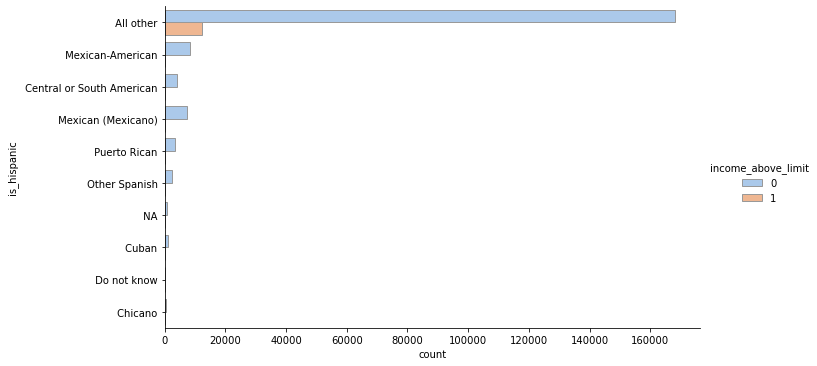

In [118]:
sns.catplot(data=train, y='is_hispanic', hue='income_above_limit',
           kind="count", aspect=2,palette="pastel", edgecolor=".6",)

In [119]:
for type in train['is_hispanic'].value_counts().reset_index()['index']:
    print(f"**{type}**")
    val_count = train[train['is_hispanic'] == type]['income_above_limit'].value_counts()
    try:
        ratio = val_count.iloc[1]/(val_count[0] + val_count[1])
    except Exception as e:
        print(e)
    print(val_count)
    print(f"{type} --> Ratio of 1:0 in income_above_limit is {ratio}")
    print('\n')

** All other**
0    168071
1     12333
Name: income_above_limit, dtype: int64
 All other --> Ratio of 1:0 in income_above_limit is 0.06836322919669187


** Mexican-American**
0    8331
1     178
Name: income_above_limit, dtype: int64
 Mexican-American --> Ratio of 1:0 in income_above_limit is 0.02091902691268069


** Mexican (Mexicano)**
0    7520
1      94
Name: income_above_limit, dtype: int64
 Mexican (Mexicano) --> Ratio of 1:0 in income_above_limit is 0.012345679012345678


** Central or South American**
0    4082
1      94
Name: income_above_limit, dtype: int64
 Central or South American --> Ratio of 1:0 in income_above_limit is 0.022509578544061302


** Puerto Rican**
0    3366
1      69
Name: income_above_limit, dtype: int64
 Puerto Rican --> Ratio of 1:0 in income_above_limit is 0.020087336244541485


** Other Spanish**
0    2528
1      84
Name: income_above_limit, dtype: int64
 Other Spanish --> Ratio of 1:0 in income_above_limit is 0.03215926493108729


** Cuban**
0    1159


In [120]:
le = LabelEncoder()
train['is_hispanic'] = le.fit_transform(train['is_hispanic'])
train['is_hispanic'].nunique()

10

In [121]:
test['is_hispanic'] = le.transform(test['is_hispanic'])
test['is_hispanic'].nunique()

10

### employment_commitment

In [122]:
train['employment_commitment'].unique()

array([' Not in labor force', ' Children or Armed Forces',
       ' Full-time schedules', ' PT for econ reasons usually PT',
       ' Unemployed full-time', ' PT for non-econ reasons usually FT',
       ' PT for econ reasons usually FT', ' Unemployed part- time'],
      dtype=object)

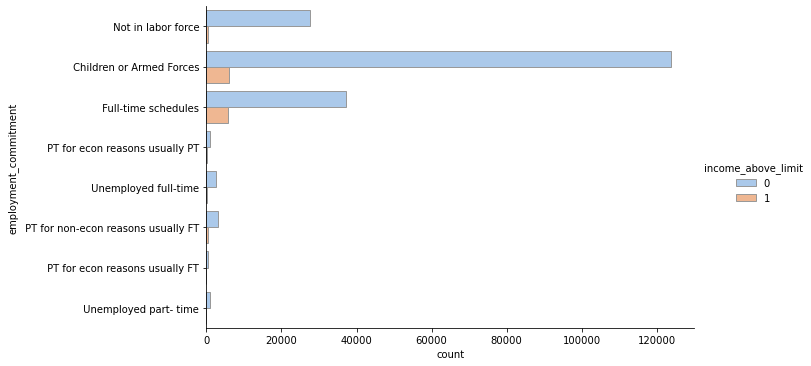

In [123]:
sns.catplot(data=train, y='employment_commitment', hue='income_above_limit',
           kind="count", aspect=2,palette="pastel", edgecolor=".6",)

In [124]:
for type in train['employment_commitment'].value_counts().reset_index()['index']:
    print(f"**{type}**")
    val_count = train[train['employment_commitment'] == type]['income_above_limit'].value_counts()
    try:
        ratio = val_count.iloc[1]/(val_count[0] + val_count[1])
    except Exception as e:
        print(e)
    print(val_count)
    print(f"{type} --> Ratio of 1:0 in income_above_limit is {ratio}")
    print('\n')

** Children or Armed Forces**
0    123690
1      6099
Name: income_above_limit, dtype: int64
 Children or Armed Forces --> Ratio of 1:0 in income_above_limit is 0.046991655687307864


** Full-time schedules**
0    37084
1     5703
Name: income_above_limit, dtype: int64
 Full-time schedules --> Ratio of 1:0 in income_above_limit is 0.13328814826933413


** Not in labor force**
0    27688
1      499
Name: income_above_limit, dtype: int64
 Not in labor force --> Ratio of 1:0 in income_above_limit is 0.017703196509028987


** PT for non-econ reasons usually FT**
0    3149
1     400
Name: income_above_limit, dtype: int64
 PT for non-econ reasons usually FT --> Ratio of 1:0 in income_above_limit is 0.11270780501549732


** Unemployed full-time**
0    2455
1      83
Name: income_above_limit, dtype: int64
 Unemployed full-time --> Ratio of 1:0 in income_above_limit is 0.032702915681639085


** PT for econ reasons usually PT**
0    1074
1     169
Name: income_above_limit, dtype: int64
 PT for e

In [125]:
employ_commit_dict = {
' Not in labor force':1, 
' Unemployed part- time':2,
' Unemployed full-time':3, 
' Children or Armed Forces':4,
' PT for econ reasons usually FT':5, 
' PT for non-econ reasons usually FT':6,
' Full-time schedules':7, 
' PT for econ reasons usually PT':8
}

In [126]:
train['employment_commitment']=train['employment_commitment'].map(employ_commit_dict)

In [127]:
test['employment_commitment']=test['employment_commitment'].map(employ_commit_dict)

### industry_code_main

In [128]:
train['industry_code_main'].unique()

array([' Not in universe or children', ' Hospital services',
       ' Retail trade', ' Finance insurance and real estate',
       ' Manufacturing-nondurable goods', ' Transportation',
       ' Business and repair services', ' Medical except hospital',
       ' Education', ' Construction', ' Manufacturing-durable goods',
       ' Public administration', ' Agriculture',
       ' Other professional services', ' Mining',
       ' Utilities and sanitary services', ' Private household services',
       ' Personal services except private HH', ' Wholesale trade',
       ' Communications', ' Entertainment', ' Social services',
       ' Forestry and fisheries', ' Armed Forces'], dtype=object)

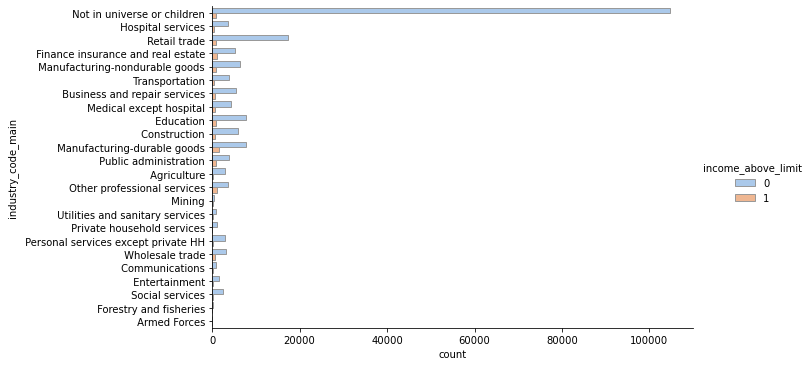

In [129]:
sns.catplot(data=train, y='industry_code_main', hue='income_above_limit',
           kind="count", aspect=2,palette="pastel", edgecolor=".6",)

In [130]:
for type in train['industry_code_main'].value_counts().reset_index()['index']:
    print(f"**{type}**")
    val_count = train[train['industry_code_main'] == type]['income_above_limit'].value_counts()
    try:
        ratio = val_count.iloc[1]/(val_count[0] + val_count[1])
    except Exception as e:
        print(e)
    print(val_count)
    print(f"{type} --> Ratio of 1:0 in income_above_limit is {ratio}")
    print('\n')

** Not in universe or children**
0    104764
1       930
Name: income_above_limit, dtype: int64
 Not in universe or children --> Ratio of 1:0 in income_above_limit is 0.008798985751319847


** Retail trade**
0    17242
1      798
Name: income_above_limit, dtype: int64
 Retail trade --> Ratio of 1:0 in income_above_limit is 0.044235033259423504


** Manufacturing-durable goods**
0    7751
1    1585
Name: income_above_limit, dtype: int64
 Manufacturing-durable goods --> Ratio of 1:0 in income_above_limit is 0.16977292202227934


** Education**
0    7781
1     958
Name: income_above_limit, dtype: int64
 Education --> Ratio of 1:0 in income_above_limit is 0.10962352671930427


** Manufacturing-nondurable goods**
0    6314
1     918
Name: income_above_limit, dtype: int64
 Manufacturing-nondurable goods --> Ratio of 1:0 in income_above_limit is 0.1269358407079646


** Construction**
0    5847
1     567
Name: income_above_limit, dtype: int64
 Construction --> Ratio of 1:0 in income_above_limi

In [131]:
def prepare_dict(col_name):
    ratio_dict={}
    for type in train[col_name].value_counts().reset_index()['index']:
        #print(f"**{type}**")
        val_count = train[train[col_name] == type]['income_above_limit'].value_counts()
        try:
            ratio = val_count.iloc[1]/(val_count[0] + val_count[1])
        except Exception as e:
            print(e)
        #print(val_count)
        #print(f"{type} --> Ratio of 1:0 in income_above_limit is {ratio}")
        #print('\n')
        
        #ratio_dict.update({col_name: ratio})
        ratio_dict[type] = ratio
    
    ratio_dict=sorted(ratio_dict.items(), key=lambda x: x[1])
    ratio_dict=dict(ratio_dict)
    
    enc_dict={}
    i       = 1

    for _key, _val in ratio_dict.items():
        print(_key, _val)
        enc_dict[_key] = i
        i += 1
    
    return ratio_dict, enc_dict

In [132]:
col_name='industry_code_main'
industry_code_main_ratio_dc, industry_code_main_enc_dc = prepare_dict(col_name)
print(industry_code_main_enc_dc)

train['industry_code_main'] = train['industry_code_main'].map(industry_code_main_enc_dc)

 Private household services 0.0048638132295719845
 Not in universe or children 0.008798985751319847
 Social services 0.03436682853940979
 Personal services except private HH 0.03468586387434555
 Retail trade 0.044235033259423504
 Agriculture 0.062401013620525816
 Entertainment 0.06801573917931422
 Construction 0.08840037418147802
 Business and repair services 0.10629463544261751
 Education 0.10962352671930427
 Transportation 0.11676849966055669
 Hospital services 0.12353228962818004
 Manufacturing-nondurable goods 0.1269358407079646
 Medical except hospital 0.12809079854073774
 Forestry and fisheries 0.12935323383084577
 Wholesale trade 0.15366614664586584
 Manufacturing-durable goods 0.16977292202227934
 Public administration 0.17530811729706758
 Finance insurance and real estate 0.18544823232323232
 Utilities and sanitary services 0.21567043618739903
 Communications 0.21904761904761905
 Other professional services 0.2368705424681219
 Armed Forces 0.25
 Mining 0.2566510172143975
{' Pr

In [133]:
test['industry_code_main'].unique()

array([' Transportation', ' Manufacturing-durable goods',
       ' Business and repair services', ' Not in universe or children',
       ' Finance insurance and real estate',
       ' Utilities and sanitary services', ' Wholesale trade',
       ' Education', ' Manufacturing-nondurable goods',
       ' Social services', ' Retail trade', ' Public administration',
       ' Medical except hospital', ' Personal services except private HH',
       ' Other professional services', ' Communications',
       ' Hospital services', ' Construction', ' Agriculture',
       ' Entertainment', ' Private household services', ' Armed Forces',
       ' Mining', ' Forestry and fisheries'], dtype=object)

In [134]:
test['industry_code_main'] = test['industry_code_main'].map(industry_code_main_enc_dc)

### occupation_code_main

In [135]:
train['occupation_code_main'].unique()

array(['Not available', ' Adm support including clerical',
       ' Other service', ' Executive admin and managerial', ' Sales',
       ' Machine operators assmblrs & inspctrs',
       ' Precision production craft & repair', ' Professional specialty',
       ' Handlers equip cleaners etc ',
       ' Transportation and material moving',
       ' Farming forestry and fishing', ' Private household services',
       ' Technicians and related support', ' Protective services',
       ' Armed Forces'], dtype=object)

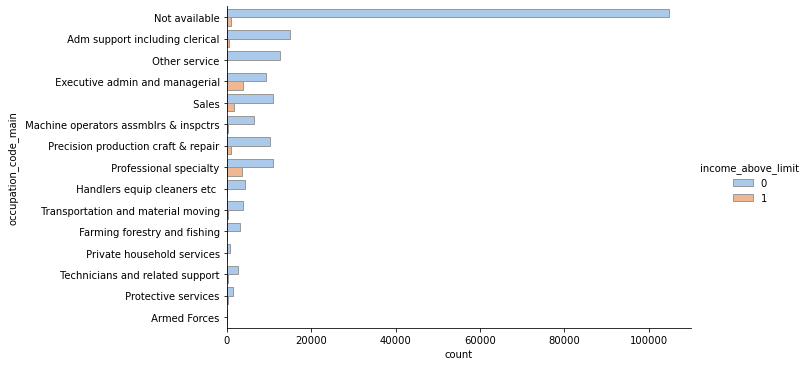

In [136]:
sns.catplot(data=train, y='occupation_code_main', hue='income_above_limit',
           kind="count", aspect=2,palette="pastel", edgecolor=".6",)

In [137]:
col_name='occupation_code_main'
occupation_code_main_ratio_dc, occupation_code_main_enc_dc = prepare_dict(col_name)
print(occupation_code_main_enc_dc)

 Private household services 0.002277904328018223
Not available 0.008798985751319847
 Other service 0.010267579340385812
 Handlers equip cleaners etc  0.017741935483870968
 Adm support including clerical 0.030551755585955312
 Machine operators assmblrs & inspctrs 0.03669172932330827
 Farming forestry and fishing 0.05163458600672166
 Transportation and material moving 0.0706880301602262
 Precision production craft & repair 0.08994378513429106
 Technicians and related support 0.11479591836734694
 Sales 0.12845359173540483
 Protective services 0.15588235294117647
 Armed Forces 0.25
 Professional specialty 0.2528190319031903
 Executive admin and managerial 0.28633554589150834
{' Private household services': 1, 'Not available': 2, ' Other service': 3, ' Handlers equip cleaners etc ': 4, ' Adm support including clerical': 5, ' Machine operators assmblrs & inspctrs': 6, ' Farming forestry and fishing': 7, ' Transportation and material moving': 8, ' Precision production craft & repair': 9, ' Te

In [138]:
train['occupation_code_main']=train['occupation_code_main'].map(occupation_code_main_enc_dc)

In [139]:
test['occupation_code_main'].unique()

array([' Transportation and material moving',
       ' Machine operators assmblrs & inspctrs',
       ' Professional specialty', 'Not available',
       ' Adm support including clerical',
       ' Precision production craft & repair',
       ' Technicians and related support',
       ' Executive admin and managerial', ' Handlers equip cleaners etc ',
       ' Other service', ' Sales', ' Protective services',
       ' Farming forestry and fishing', ' Private household services',
       ' Armed Forces'], dtype=object)

In [140]:
test['occupation_code_main']=test['occupation_code_main'].map(occupation_code_main_enc_dc)

#### household_stat

In [141]:
train['household_stat'].unique()

array([' Householder', ' Nonfamily householder',
       ' Child 18+ never marr Not in a subfamily',
       ' Child <18 never marr not in subfamily', ' Spouse of householder',
       ' Child 18+ spouse of subfamily RP', ' Secondary individual',
       ' Child 18+ never marr RP of subfamily',
       ' Other Rel 18+ spouse of subfamily RP',
       ' Grandchild <18 never marr not in subfamily',
       ' Other Rel <18 never marr child of subfamily RP',
       ' Other Rel 18+ ever marr RP of subfamily',
       ' Other Rel 18+ ever marr not in subfamily',
       ' Child 18+ ever marr Not in a subfamily',
       ' RP of unrelated subfamily',
       ' Child 18+ ever marr RP of subfamily',
       ' Other Rel 18+ never marr not in subfamily',
       ' Child under 18 of RP of unrel subfamily',
       ' Grandchild <18 never marr child of subfamily RP',
       ' Grandchild 18+ never marr not in subfamily',
       ' Other Rel <18 never marr not in subfamily', ' In group quarters',
       ' Grandchild

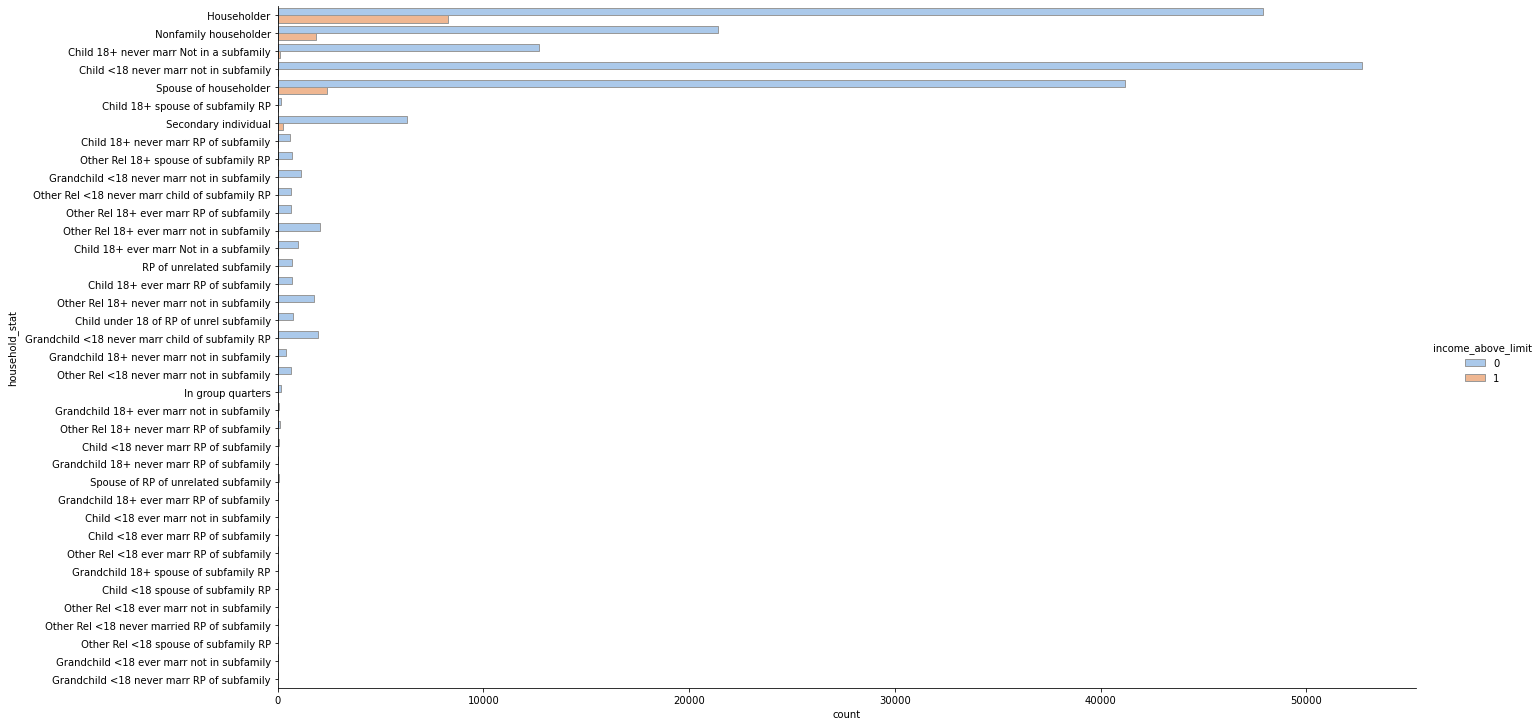

In [142]:
sns.catplot(data=train, y='household_stat', hue='income_above_limit',
           kind="count", aspect=2,palette="pastel", edgecolor=".6", height=10)

In [143]:
col_name='household_stat'
household_stat_ratio_dc, household_stat_enc_dc = prepare_dict(col_name)
print(household_stat_enc_dc)

single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
 Child <18 never marr not in subfamily 3.794562392092132e-05
 Child 18+ never marr RP of subfamily 0.004846526655896607
 Grandchild 18+ never marr not in subfamily 0.00498753117206982

In [144]:
train['household_stat']=train['household_stat'].map(household_stat_enc_dc)

In [145]:
train['household_stat'].nunique(), test['household_stat'].nunique()

(38, 36)

In [146]:
test['household_stat'] = test['household_stat'].map(household_stat_enc_dc)

#### household_summary

In [147]:
train['household_summary'].unique()

array([' Householder', ' Child 18 or older',
       ' Child under 18 never married', ' Spouse of householder',
       ' Nonrelative of householder', ' Other relative of householder',
       ' Group Quarters- Secondary individual',
       ' Child under 18 ever married'], dtype=object)

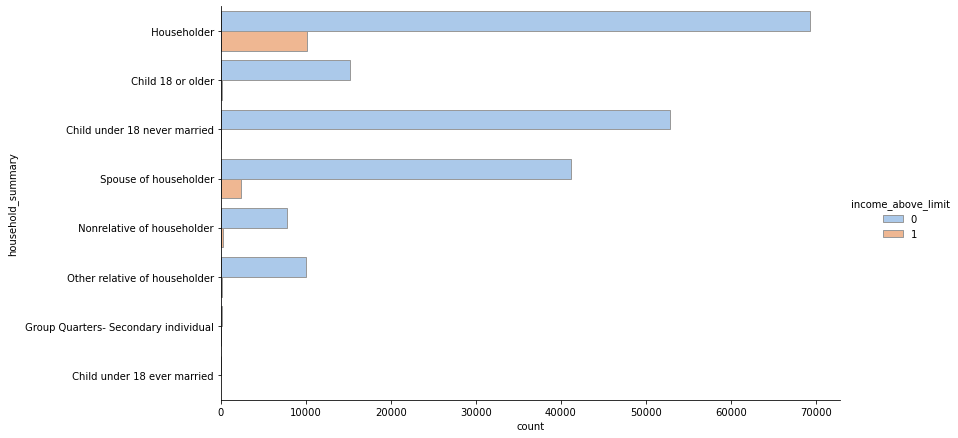

In [148]:
sns.catplot(data=train, y='household_summary', hue='income_above_limit',
           kind="count", aspect=2,palette="pastel", edgecolor=".6", height=6)

In [149]:
col_name='household_summary'
household_summary_ratio_dc, household_summary_enc_dc = prepare_dict(col_name)
print(household_summary_enc_dc)

single positional indexer is out-of-bounds
 Child under 18 never married 3.787663579720849e-05
 Group Quarters- Secondary individual 0.008130081300813009
 Child under 18 ever married 0.008130081300813009
 Child 18 or older 0.008649498722233143
 Other relative of householder 0.009254701191296642
 Nonrelative of householder 0.031312127236580514
 Spouse of householder 0.05503808387629623
 Householder 0.12731848496287906
{' Child under 18 never married': 1, ' Group Quarters- Secondary individual': 2, ' Child under 18 ever married': 3, ' Child 18 or older': 4, ' Other relative of householder': 5, ' Nonrelative of householder': 6, ' Spouse of householder': 7, ' Householder': 8}


In [150]:
train['household_summary']=train['household_summary'].map(household_summary_enc_dc)

In [151]:
test['household_summary']=test['household_summary'].map(household_summary_enc_dc)

#### tax_status

In [152]:
train['tax_status'].unique()

array([' Head of household', ' Single', ' Nonfiler', ' Joint both 65+',
       ' Joint both under 65', ' Joint one under 65 & one 65+'],
      dtype=object)

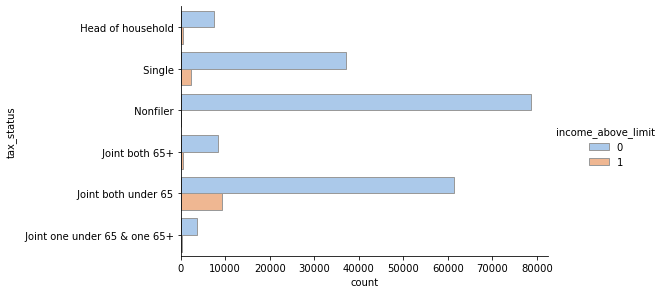

In [153]:
sns.catplot(data=train, y='tax_status', hue='income_above_limit',
           kind="count", aspect=2,palette="pastel", edgecolor=".6", height=4)

In [154]:
col_name='tax_status'
tax_status_ratio_dc, tax_status_enc_dc = prepare_dict(col_name)
print(tax_status_enc_dc)

 Nonfiler 0.0004194684191125065
 Joint both 65+ 0.05278125355477192
 Single 0.060539197037713356
 Head of household 0.061151991880233444
 Joint one under 65 & one 65+ 0.07958140666828913
 Joint both under 65 0.13176713822450684
{' Nonfiler': 1, ' Joint both 65+': 2, ' Single': 3, ' Head of household': 4, ' Joint one under 65 & one 65+': 5, ' Joint both under 65': 6}


In [155]:
train['tax_status']=train['tax_status'].map(tax_status_enc_dc)

In [156]:
test['tax_status']=test['tax_status'].map(tax_status_enc_dc)

#### citizenship

In [157]:
train['citizenship'].unique()

array(['Native', ' Foreign born- Not a citizen of U S ',
       ' Foreign born- U S citizen by naturalization',
       ' Native- Born abroad of American Parent(s)',
       ' Native- Born in Puerto Rico or U S Outlying'], dtype=object)

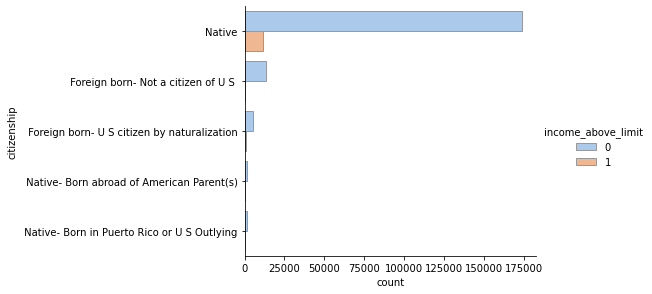

In [158]:
sns.catplot(data=train, y='citizenship', hue='income_above_limit',
           kind="count", aspect=2,palette="pastel", edgecolor=".6", height=4)

In [159]:
col_name='citizenship'
citizenship_ratio_dc, citizenship_enc_dc = prepare_dict(col_name)
print(citizenship_enc_dc)

 Native- Born in Puerto Rico or U S Outlying 0.022915340547422024
 Foreign born- Not a citizen of U S  0.03617186946980958
Native 0.06306922534187183
 Native- Born abroad of American Parent(s) 0.06340956340956341
 Foreign born- U S citizen by naturalization 0.09971005154639176
{' Native- Born in Puerto Rico or U S Outlying': 1, ' Foreign born- Not a citizen of U S ': 2, 'Native': 3, ' Native- Born abroad of American Parent(s)': 4, ' Foreign born- U S citizen by naturalization': 5}


In [160]:
train['citizenship']=train['citizenship'].map(citizenship_enc_dc)

In [161]:
test['citizenship']=test['citizenship'].map(citizenship_enc_dc)

#### country_of_birth_own

In [162]:
train['country_of_birth_own'].unique()

array(['US', ' ?', ' El-Salvador', ' Mexico', ' Philippines', ' Cambodia',
       ' China', ' Hungary', ' Puerto-Rico', ' England',
       ' Dominican-Republic', ' Japan', ' Canada', ' Ecuador', ' Italy',
       ' Cuba', ' Peru', ' Taiwan', ' South Korea', ' Poland',
       ' Nicaragua', ' Germany', ' Guatemala', ' India', ' Ireland',
       ' Honduras', ' France', ' Trinadad&Tobago', ' Thailand', ' Iran',
       ' Vietnam', ' Portugal', ' Laos', ' Panama', ' Scotland',
       ' Columbia', ' Jamaica', ' Greece', ' Haiti', ' Yugoslavia',
       ' Outlying-U S (Guam USVI etc)', ' Holand-Netherlands',
       ' Hong Kong'], dtype=object)

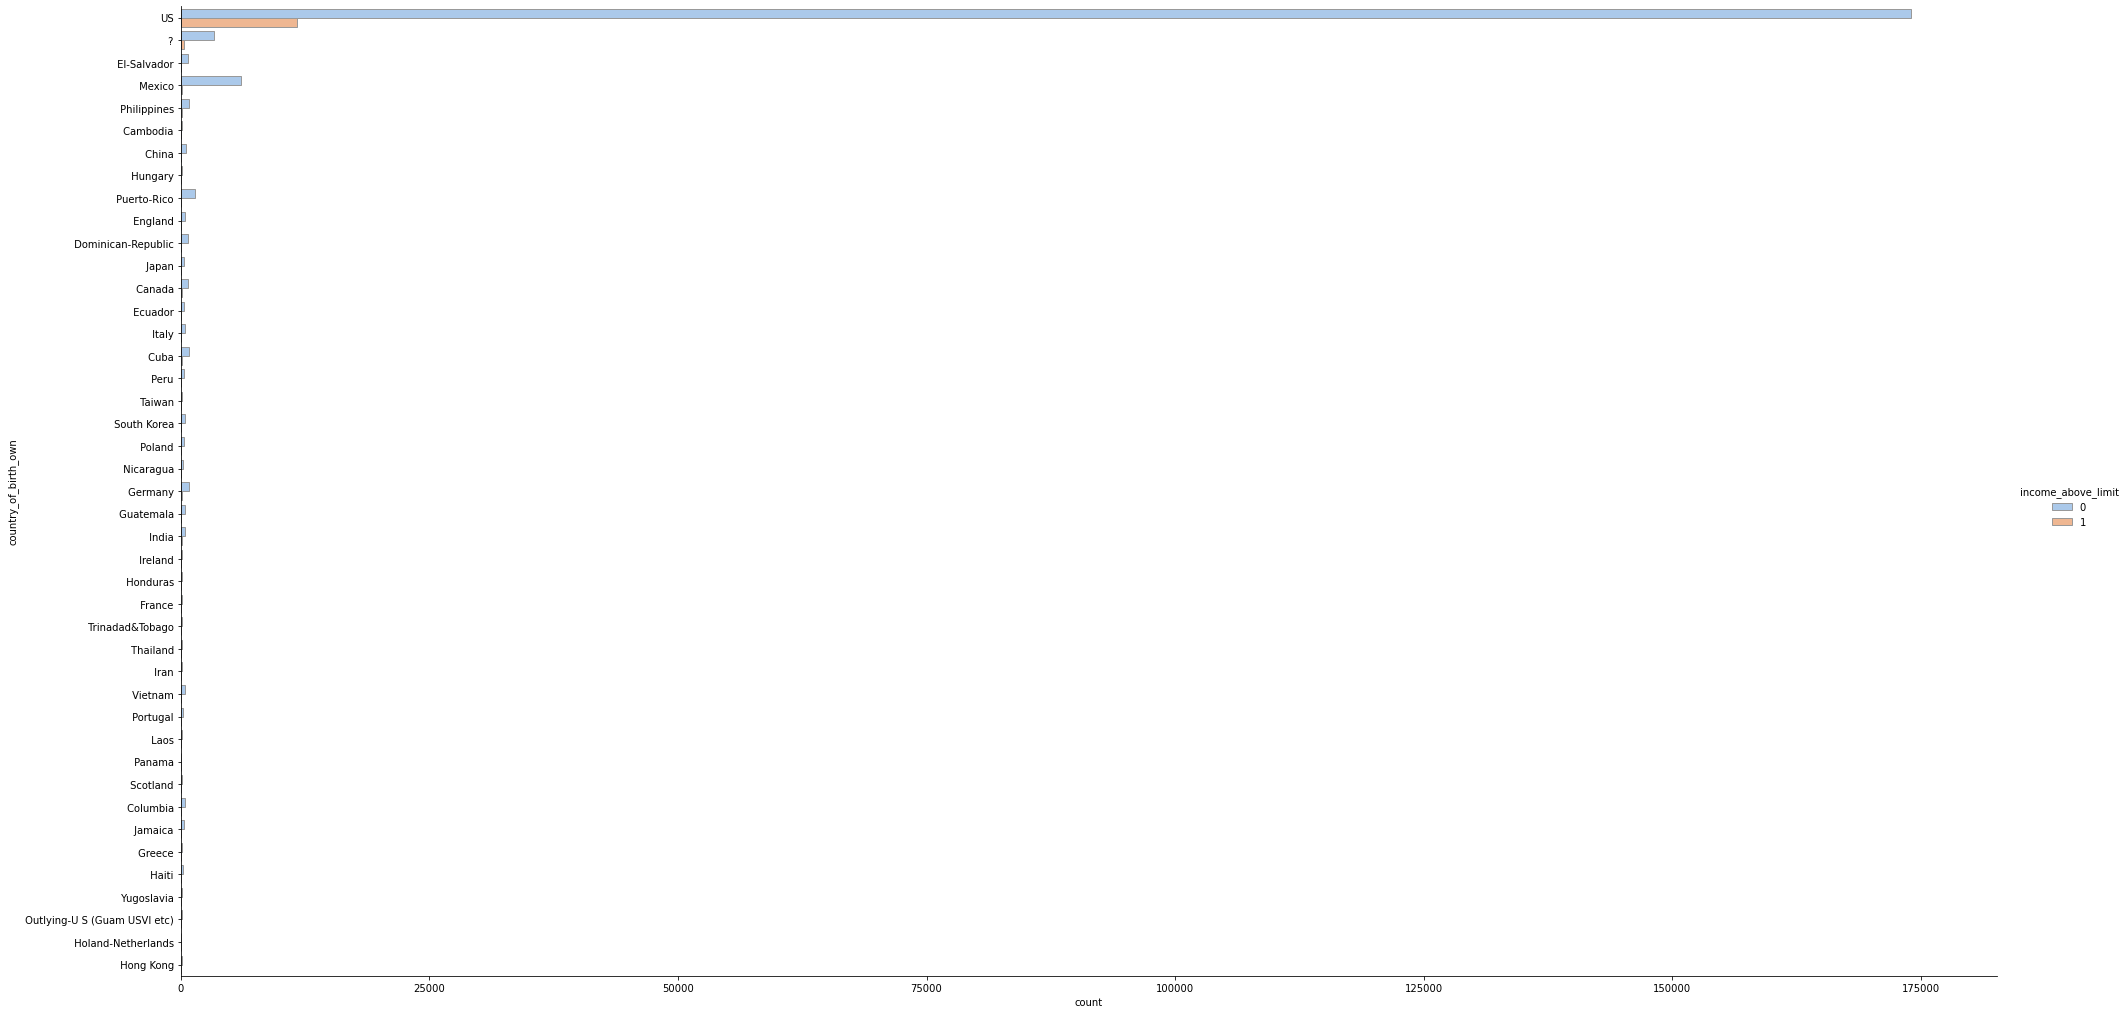

In [163]:
sns.catplot(data=train, y='country_of_birth_own', hue='income_above_limit',
           kind="count", aspect=2,palette="pastel", edgecolor=".6", height=14)

In [164]:
col_name='country_of_birth_own'
country_of_birth_own_ratio_dc, country_of_birth_own_enc_dc = prepare_dict(col_name)
print(country_of_birth_own_enc_dc)

 Honduras 0.006289308176100629
 Guatemala 0.010723860589812333
 Mexico 0.013646826701742847
 Dominican-Republic 0.014844804318488529
 El-Salvador 0.016129032258064516
 Nicaragua 0.016597510373443983
 Laos 0.017543859649122806
 Cambodia 0.019230769230769232
 Puerto-Rico 0.02194787379972565
 Vietnam 0.0234375
 Haiti 0.02666666666666667
 Columbia 0.035164835164835165
 Outlying-U S (Guam USVI etc) 0.035398230088495575
 Peru 0.036101083032490974
 Trinadad&Tobago 0.037037037037037035
 Ecuador 0.039711191335740074
 Panama 0.04
 Yugoslavia 0.04225352112676056
 Portugal 0.0449438202247191
 South Korea 0.055327868852459015
 Jamaica 0.056818181818181816
US 0.06307024441739467
 Thailand 0.064
 Poland 0.06493506493506493
 Italy 0.06753812636165578
 Cuba 0.07424071991001124
 China 0.07677165354330709
 Germany 0.08275058275058275
 ? 0.08426506681210799
 Philippines 0.08647450110864745
 Holand-Netherlands 0.08695652173913043
 Canada 0.09446693657219973
 Hong Kong 0.09482758620689655
 Ireland 0.1041666

In [165]:
train['country_of_birth_own'] =  train['country_of_birth_own'].map(country_of_birth_own_enc_dc)

In [166]:
test['country_of_birth_own'] =  test['country_of_birth_own'].map(country_of_birth_own_enc_dc)

#### country_of_birth_father

In [167]:
train['country_of_birth_father'].unique()

array(['US', ' India', ' ?', ' Poland', ' Germany', ' El-Salvador',
       ' Mexico', ' Puerto-Rico', ' Philippines', ' Greece', ' Canada',
       ' Ireland', ' Cambodia', ' Ecuador', ' China', ' Hungary',
       ' Dominican-Republic', ' Japan', ' Italy', ' Cuba', ' Peru',
       ' Jamaica', ' South Korea', ' Yugoslavia', ' Nicaragua',
       ' Columbia', ' Guatemala', ' France', ' England', ' Iran',
       ' Honduras', ' Haiti', ' Trinadad&Tobago',
       ' Outlying-U S (Guam USVI etc)', ' Thailand', ' Vietnam',
       ' Hong Kong', ' Portugal', ' Laos', ' Scotland', ' Taiwan',
       ' Holand-Netherlands', ' Panama'], dtype=object)

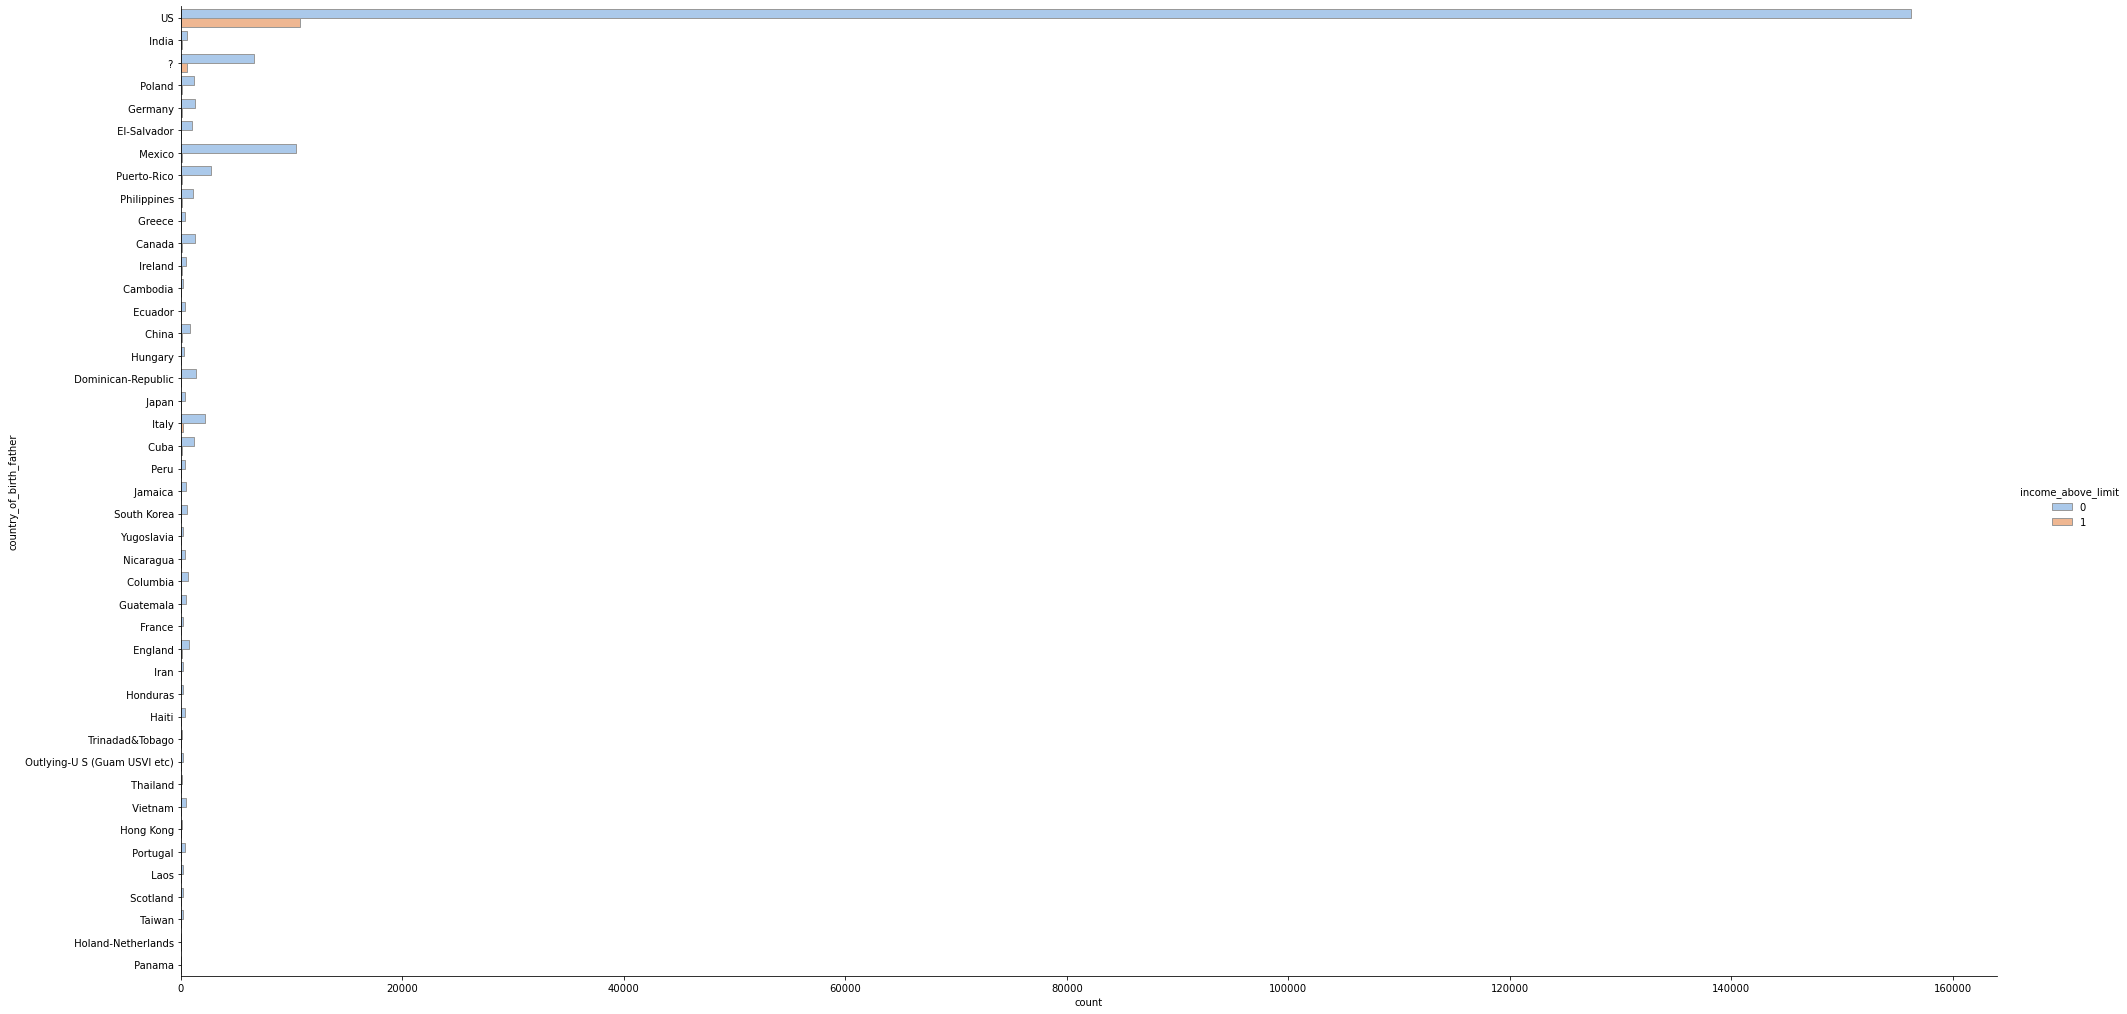

In [168]:
sns.catplot(data=train, y='country_of_birth_father', hue='income_above_limit',
           kind="count", aspect=2,palette="pastel", edgecolor=".6", height=14)

In [169]:
col_name='country_of_birth_father'
country_of_birth_father_ratio_dc, country_of_birth_father_enc_dc = prepare_dict(col_name)
print(country_of_birth_father_enc_dc)

single positional indexer is out-of-bounds
 Guatemala 0.004140786749482402
 El-Salvador 0.008506616257088847
 Dominican-Republic 0.010737294201861132
 Laos 0.012121212121212121
 Mexico 0.01312161262717505
 Haiti 0.0196078431372549
 Vietnam 0.02
 Nicaragua 0.023323615160349854
 Puerto-Rico 0.023474178403755867
 Cambodia 0.028169014084507043
 Peru 0.02865329512893983
 Trinadad&Tobago 0.030303030303030304
 Columbia 0.03139717425431711
 Ecuador 0.03307888040712468
 Panama 0.034482758620689655
 Jamaica 0.04259634888438134
 Outlying-U S (Guam USVI etc) 0.04819277108433735
 Portugal 0.05141388174807198
 South Korea 0.05253623188405797
 Cuba 0.05380794701986755
 Thailand 0.0603448275862069
 Hong Kong 0.06086956521739131
US 0.06465909635379234
 Italy 0.06573367260390162
 Philippines 0.0691358024691358
 Yugoslavia 0.07207207207207207
 Honduras 0.07207207207207207
 Scotland 0.07630522088353414
 Germany 0.07864357864357864
 ? 0.08132572065171982
 Poland 0.08161648177496038
 Canada 0.09097421203438

In [170]:
train['country_of_birth_father'] = train['country_of_birth_father'].map(country_of_birth_father_enc_dc)

In [171]:
test['country_of_birth_father'] = test['country_of_birth_father'].map(country_of_birth_father_enc_dc)

### country_of_birth_mother

In [172]:
train['country_of_birth_mother'].nunique()

43

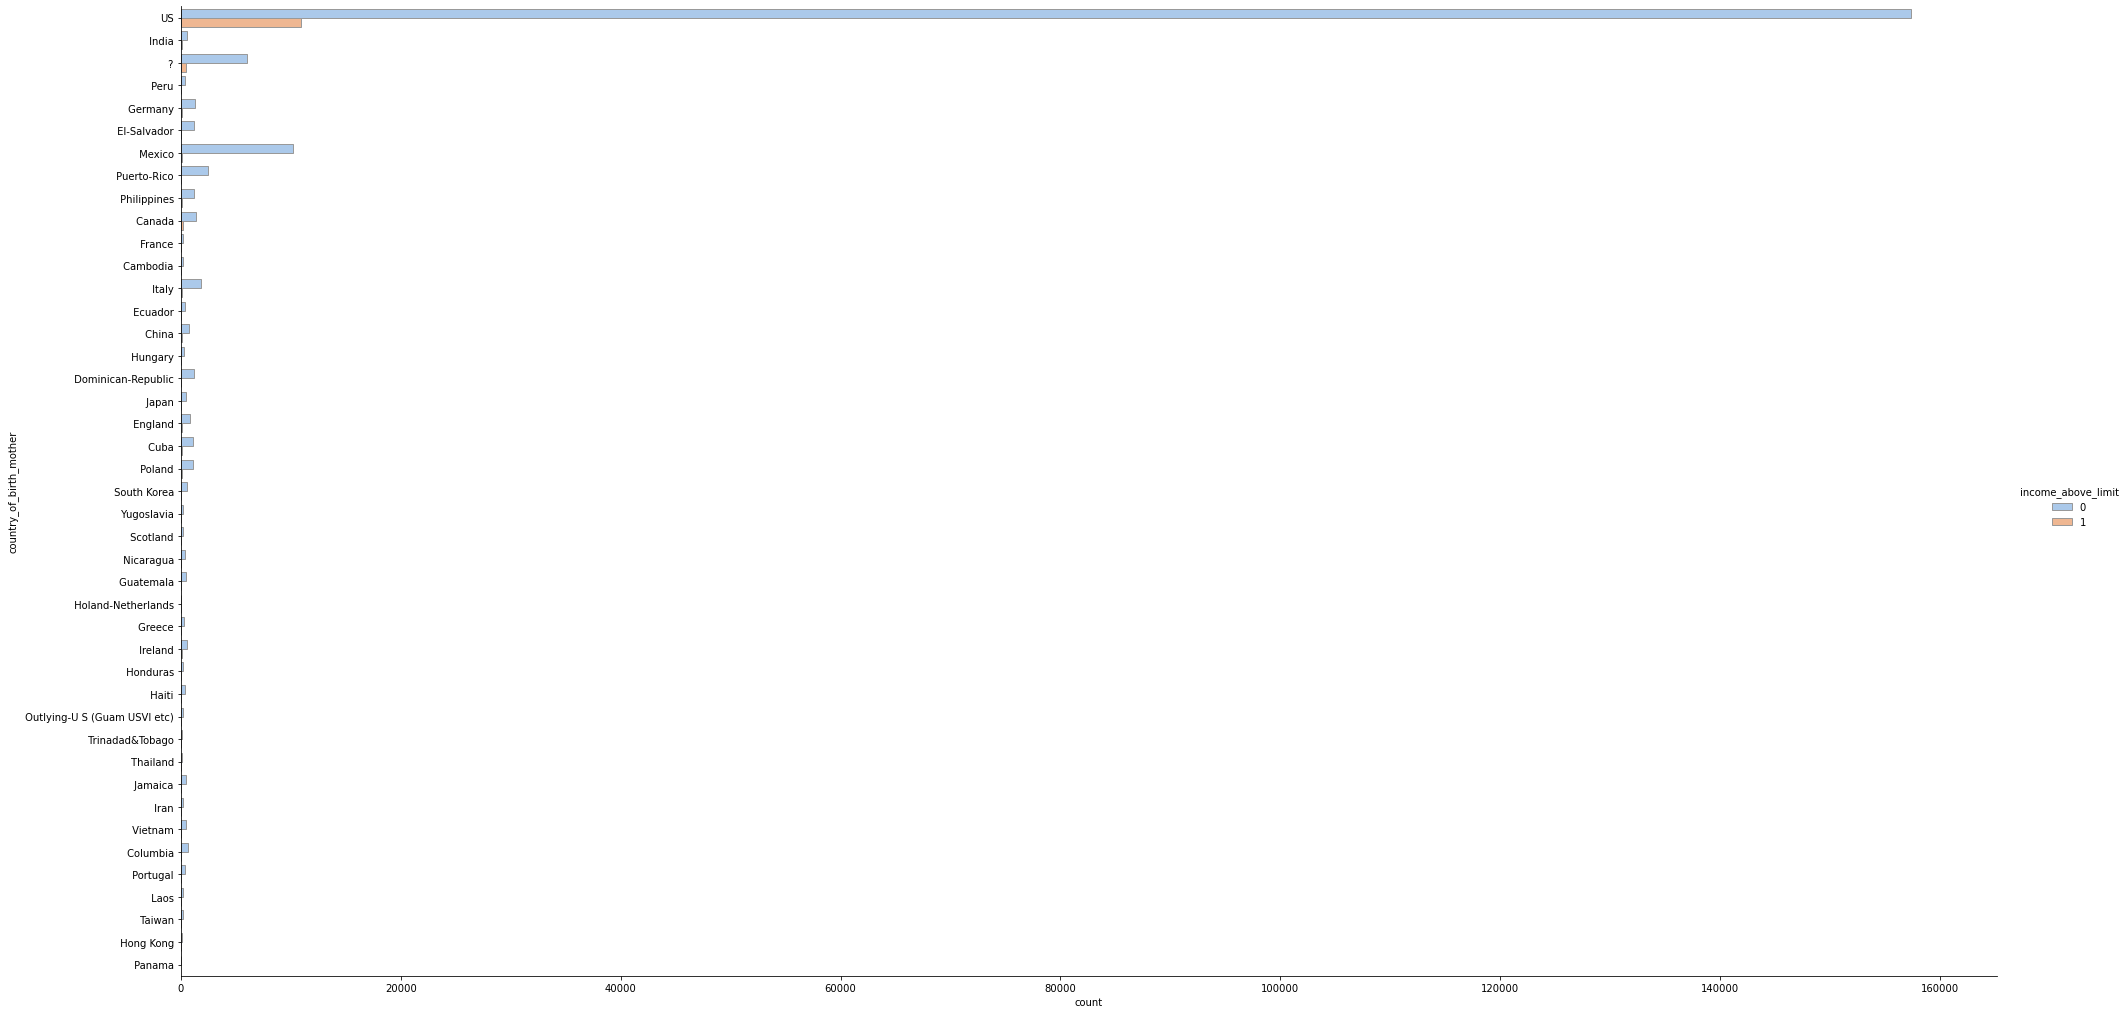

In [173]:
sns.catplot(data=train, y='country_of_birth_mother', hue='income_above_limit',
           kind="count", aspect=2,palette="pastel", edgecolor=".6", height=14)

In [174]:
col_name='country_of_birth_mother'
country_of_birth_mother_ratio_dc, country_of_birth_mother_enc_dc = prepare_dict(col_name)
print(country_of_birth_mother_enc_dc)

single positional indexer is out-of-bounds
 Honduras 0.004166666666666667
 Guatemala 0.006237006237006237
 Dominican-Republic 0.010906040268456376
 El-Salvador 0.012701100762066046
 Laos 0.012987012987012988
 Outlying-U S (Guam USVI etc) 0.013071895424836602
 Mexico 0.013751694751113694
 Haiti 0.01643835616438356
 Nicaragua 0.017699115044247787
 Vietnam 0.01875
 Puerto-Rico 0.021168169345354763
 Peru 0.026455026455026454
 Columbia 0.030303030303030304
 Cambodia 0.033707865168539325
 Ecuador 0.035175879396984924
 Jamaica 0.042682926829268296
 Portugal 0.0449438202247191
 Trinadad&Tobago 0.047619047619047616
 South Korea 0.049441786283891544
 Yugoslavia 0.052083333333333336
 Thailand 0.05223880597014925
 Italy 0.054204660587639314
 Philippines 0.05913978494623656
 Cuba 0.05950413223140496
 Hong Kong 0.0625
US 0.06483270226412179
 ? 0.07535297728667895
 Poland 0.08161512027491409
 Greece 0.08389261744966443
 Germany 0.08667621776504297
 Taiwan 0.09009009009009009
 Hungary 0.09451219512195

In [175]:
train['country_of_birth_mother'] = train['country_of_birth_mother'].map(country_of_birth_mother_enc_dc)

In [176]:
test['country_of_birth_mother'] = test['country_of_birth_mother'].map(country_of_birth_mother_enc_dc)

#### migration_code_change_in_msa

In [177]:
train['migration_code_change_in_msa'].unique()

array([' ?', 'unchanged', ' MSA to MSA', ' NonMSA to nonMSA',
       ' MSA to nonMSA', ' Not identifiable', ' NonMSA to MSA',
       ' Abroad to MSA', ' Abroad to nonMSA'], dtype=object)

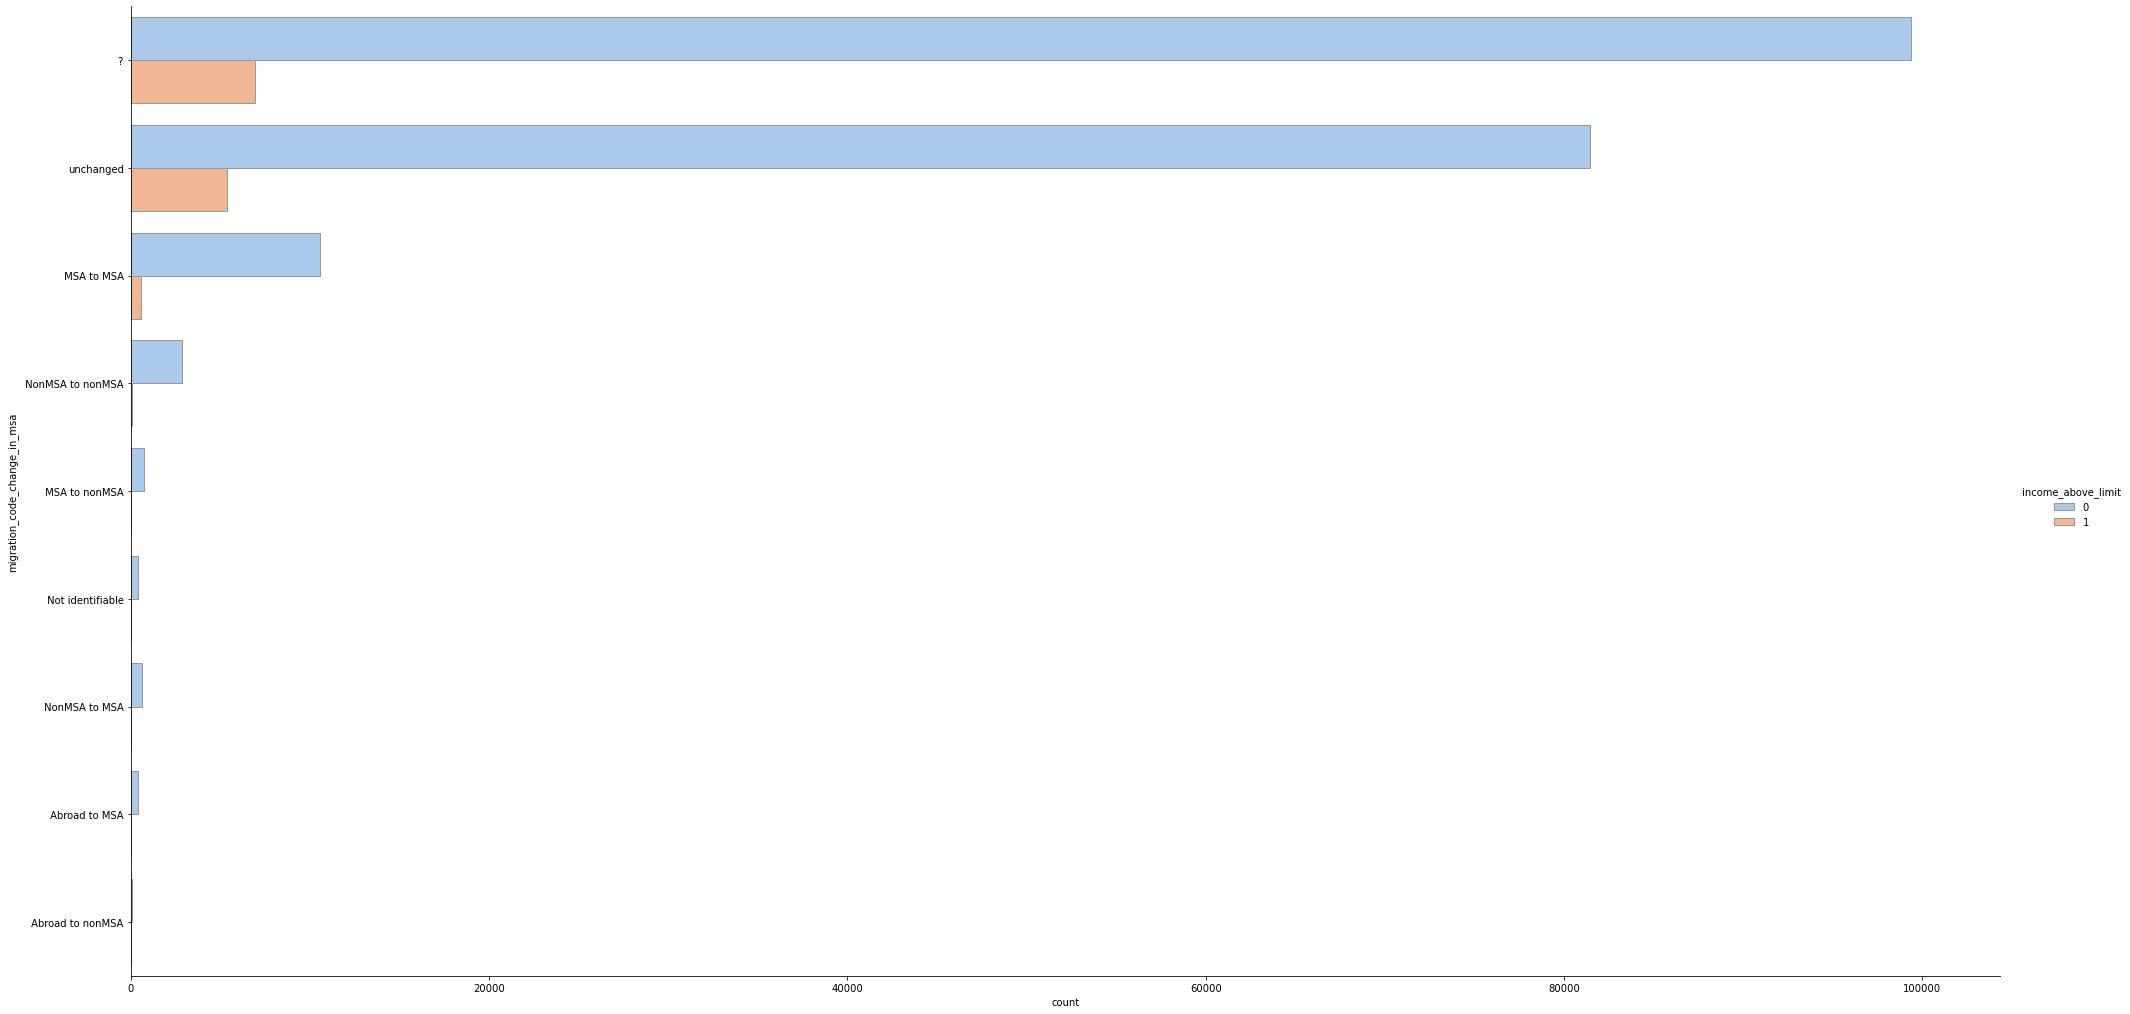

In [178]:
sns.catplot(data=train, y='migration_code_change_in_msa', hue='income_above_limit',
           kind="count", aspect=2,palette="pastel", edgecolor=".6", height=14)

In [179]:
col_name='migration_code_change_in_msa'
migration_code_change_in_msa_ratio_dc, migration_code_change_in_msa_enc_dc = prepare_dict(col_name)
print(migration_code_change_in_msa_enc_dc)

 Abroad to nonMSA 0.012658227848101266
 NonMSA to nonMSA 0.01619014812263176
 MSA to nonMSA 0.02699228791773779
 NonMSA to MSA 0.03426791277258567
 Not identifiable 0.034403669724770644
 Abroad to MSA 0.0407673860911271
 MSA to MSA 0.04929704397981254
unchanged 0.06212009578191195
 ? 0.06522148206691505
{' Abroad to nonMSA': 1, ' NonMSA to nonMSA': 2, ' MSA to nonMSA': 3, ' NonMSA to MSA': 4, ' Not identifiable': 5, ' Abroad to MSA': 6, ' MSA to MSA': 7, 'unchanged': 8, ' ?': 9}


* Not much of significance is seen
* Anyways lets encode

In [180]:
train['migration_code_change_in_msa'] = train['migration_code_change_in_msa'].map(migration_code_change_in_msa_enc_dc)

In [181]:
test['migration_code_change_in_msa'] = test['migration_code_change_in_msa'].map(migration_code_change_in_msa_enc_dc)

#### migration_prev_sunbelt

In [182]:
train['migration_prev_sunbelt'].unique()

array([' ?', '?', ' No', 'Same'], dtype=object)

In [183]:
train['migration_prev_sunbelt'].value_counts()

 ?      104696
?        88452
 No      10298
Same      6053
Name: migration_prev_sunbelt, dtype: int64

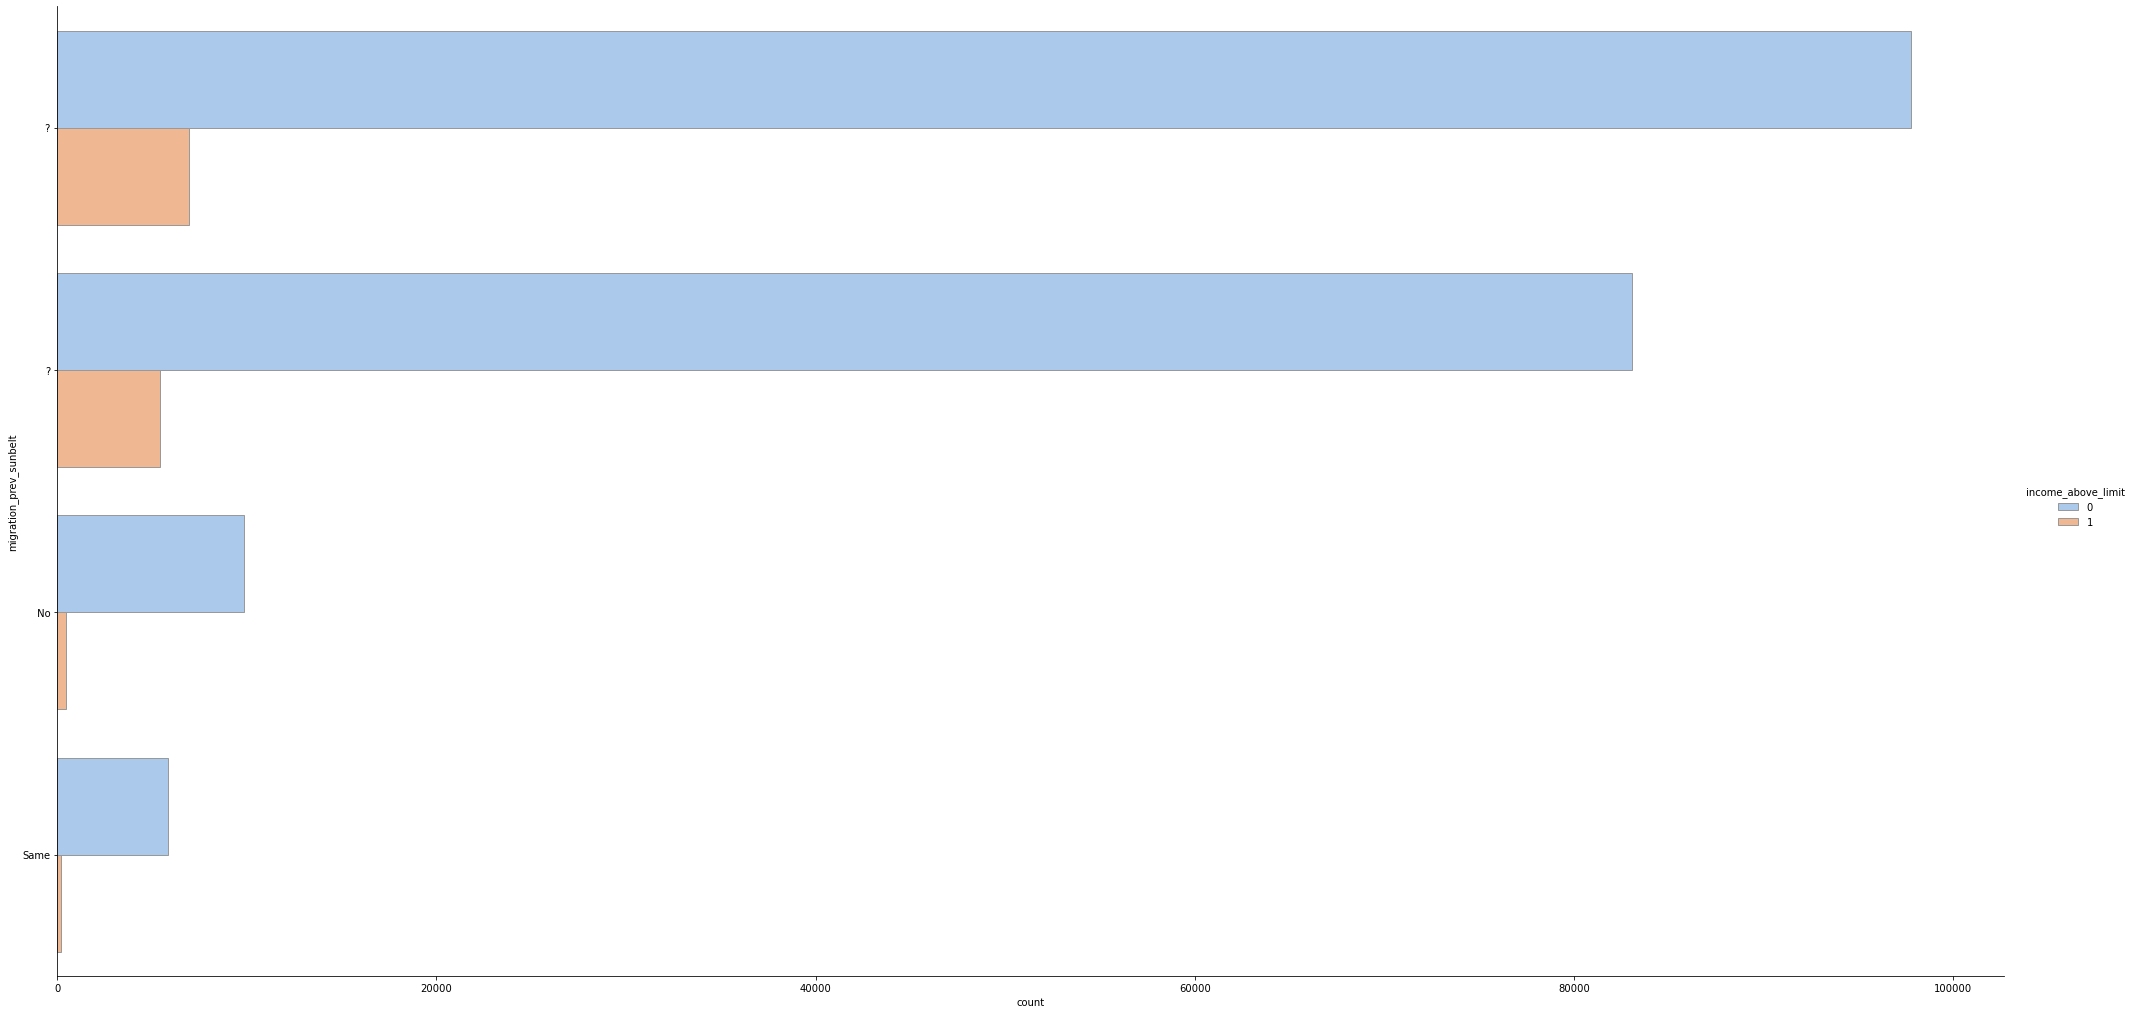

In [184]:
sns.catplot(data=train, y='migration_prev_sunbelt', hue='income_above_limit',
           kind="count", aspect=2,palette="pastel", edgecolor=".6", height=14)

In [185]:
train['migration_prev_sunbelt'] = train['migration_prev_sunbelt'].replace(to_replace='?', value=' ?')

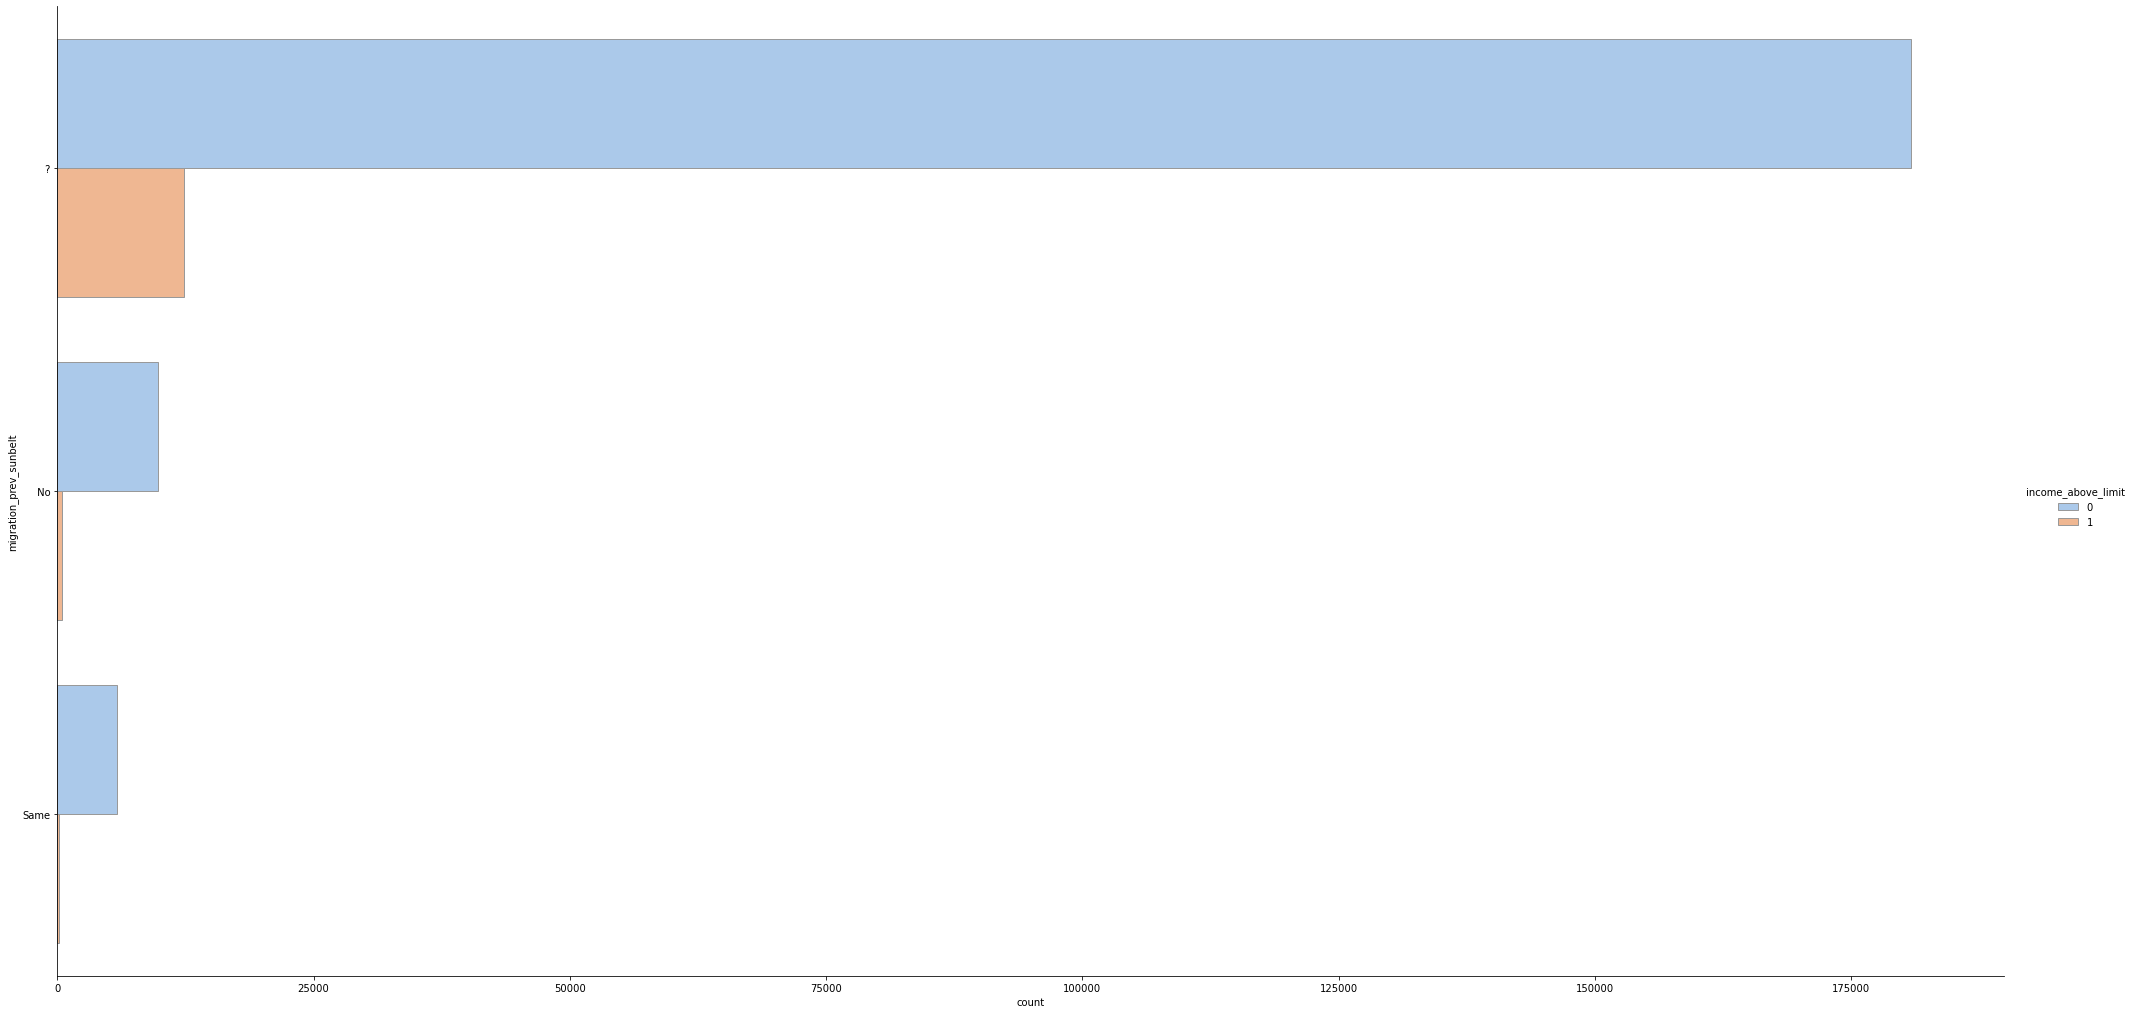

In [186]:
sns.catplot(data=train, y='migration_prev_sunbelt', hue='income_above_limit',
           kind="count", aspect=2,palette="pastel", edgecolor=".6", height=14)

In [187]:
col_name='migration_prev_sunbelt'
migration_prev_sunbelt_ratio_dc, migration_prev_sunbelt_enc_dc = prepare_dict(col_name)
print(migration_prev_sunbelt_enc_dc)

Same 0.034032711052370726
 No 0.04505729267818994
 ? 0.06382670283927351
{'Same': 1, ' No': 2, ' ?': 3}


* Not much of significance

In [188]:
train['migration_prev_sunbelt'] = train['migration_prev_sunbelt'].map(migration_prev_sunbelt_enc_dc)

In [189]:
test['migration_prev_sunbelt'].unique()

array(['?', ' ?', 'Same', ' No'], dtype=object)

In [190]:
test['migration_prev_sunbelt'] = test['migration_prev_sunbelt'].replace(to_replace='?', value=' ?')
test['migration_prev_sunbelt'].unique()

array([' ?', 'Same', ' No'], dtype=object)

In [191]:
test['migration_prev_sunbelt'] = test['migration_prev_sunbelt'].map(migration_prev_sunbelt_enc_dc)

#### migration_code_move_within_reg

In [192]:
train['migration_code_move_within_reg'].unique()

array([' ?', 'unchanged', ' Same county', ' Different state in South',
       ' Different county same state', ' Different state in West',
       ' Different state in Northeast', ' Abroad',
       ' Different state in Midwest'], dtype=object)

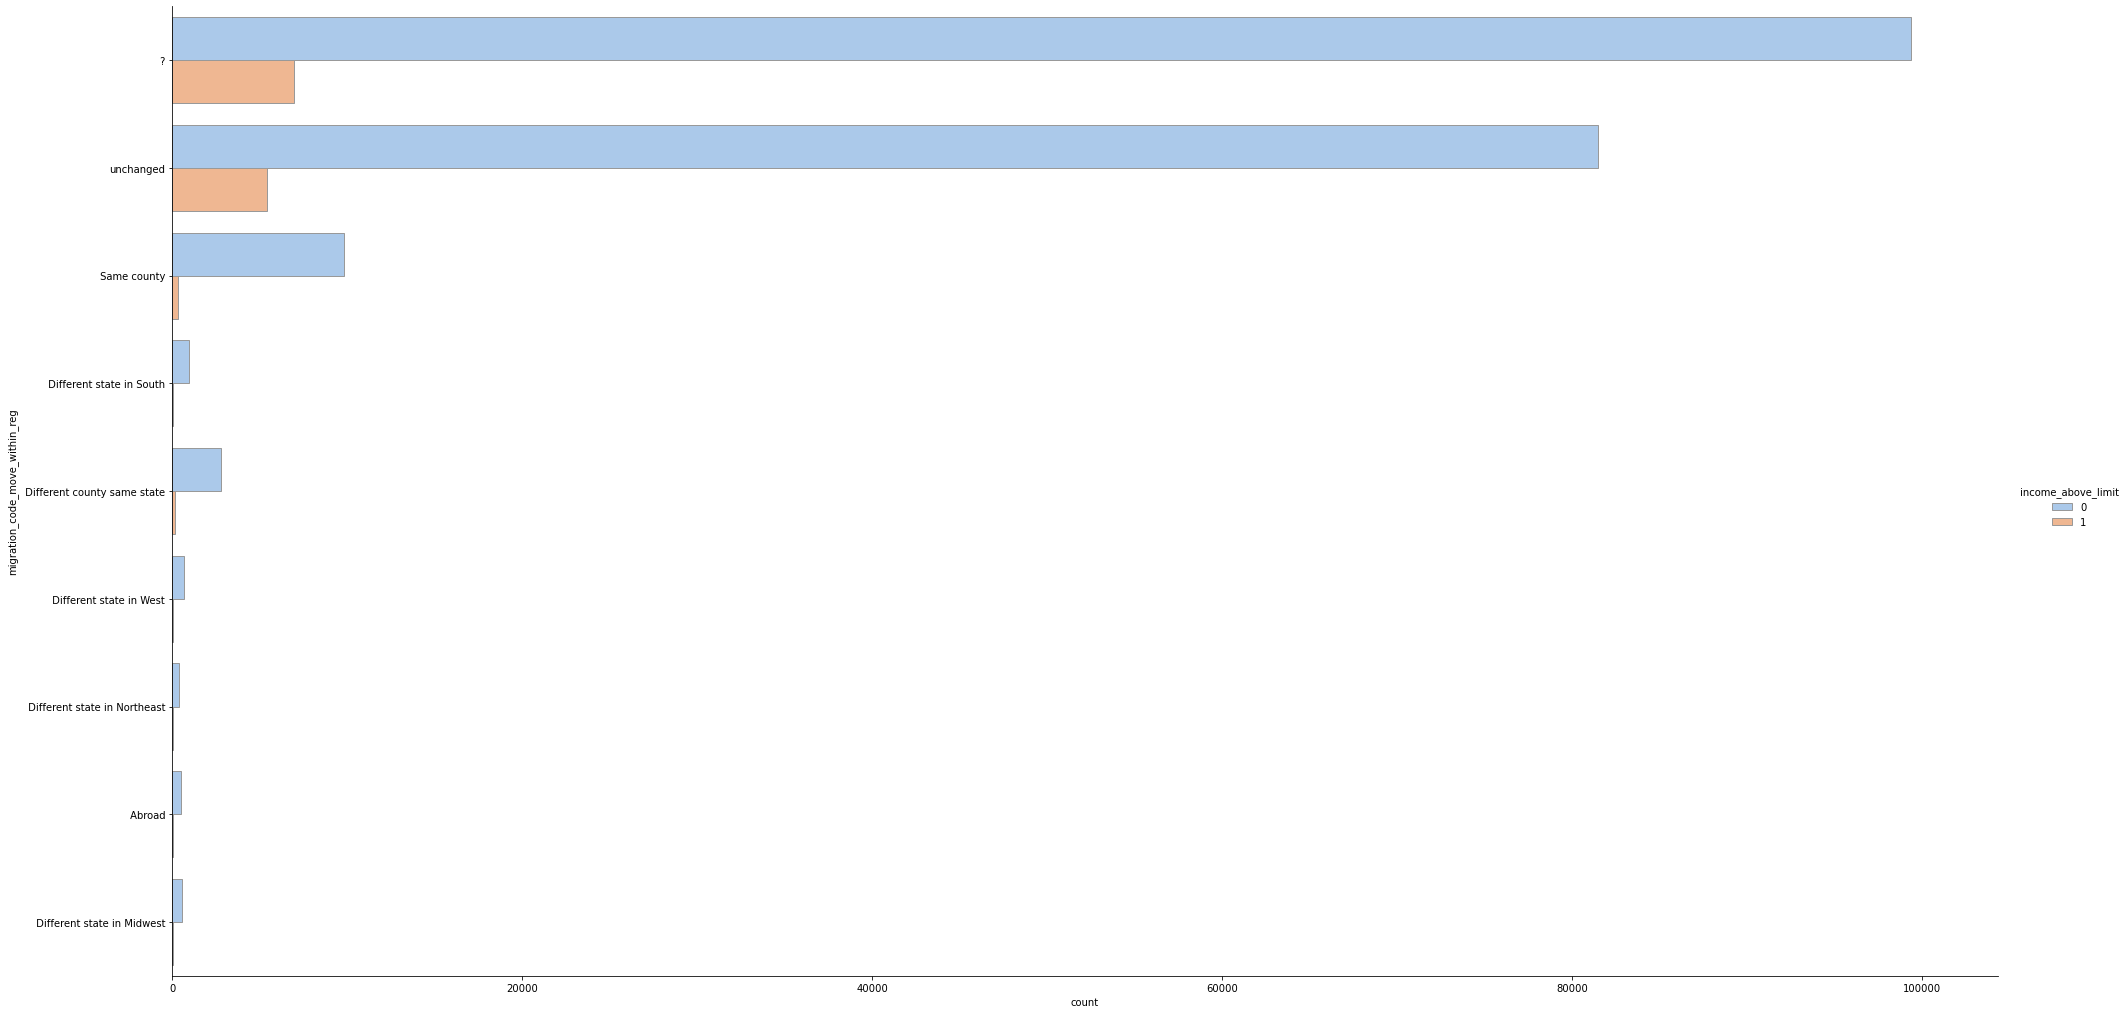

In [193]:
sns.catplot(data=train, y='migration_code_move_within_reg', hue='income_above_limit',
           kind="count", aspect=2,palette="pastel", edgecolor=".6", height=14)

In [194]:
col_name='migration_code_move_within_reg'
migration_code_move_within_reg_ratio_dc, migration_code_move_within_reg_enc_dc = prepare_dict(col_name)
print(migration_code_move_within_reg_enc_dc)

 Same county 0.03491565319733229
 Abroad 0.03614457831325301
 Different state in West 0.04897959183673469
 Different state in Midwest 0.05
 Different county same state 0.05023761031907671
 Different state in South 0.0518444666001994
unchanged 0.06212009578191195
 ? 0.06522148206691505
 Different state in Northeast 0.0774818401937046
{' Same county': 1, ' Abroad': 2, ' Different state in West': 3, ' Different state in Midwest': 4, ' Different county same state': 5, ' Different state in South': 6, 'unchanged': 7, ' ?': 8, ' Different state in Northeast': 9}


* Not much of significance

In [195]:
train['migration_code_move_within_reg'] = train['migration_code_move_within_reg'].map(migration_code_move_within_reg_enc_dc)

In [196]:
test['migration_code_move_within_reg'] = test['migration_code_move_within_reg'].map(migration_code_move_within_reg_enc_dc)

#### migration_code_change_in_reg

In [197]:
train['migration_code_change_in_reg'].unique()

array([' ?', 'unchanged', ' Same county',
       ' Different state same division', ' Different county same state',
       ' Different region', ' Abroad', ' Different division same region'],
      dtype=object)

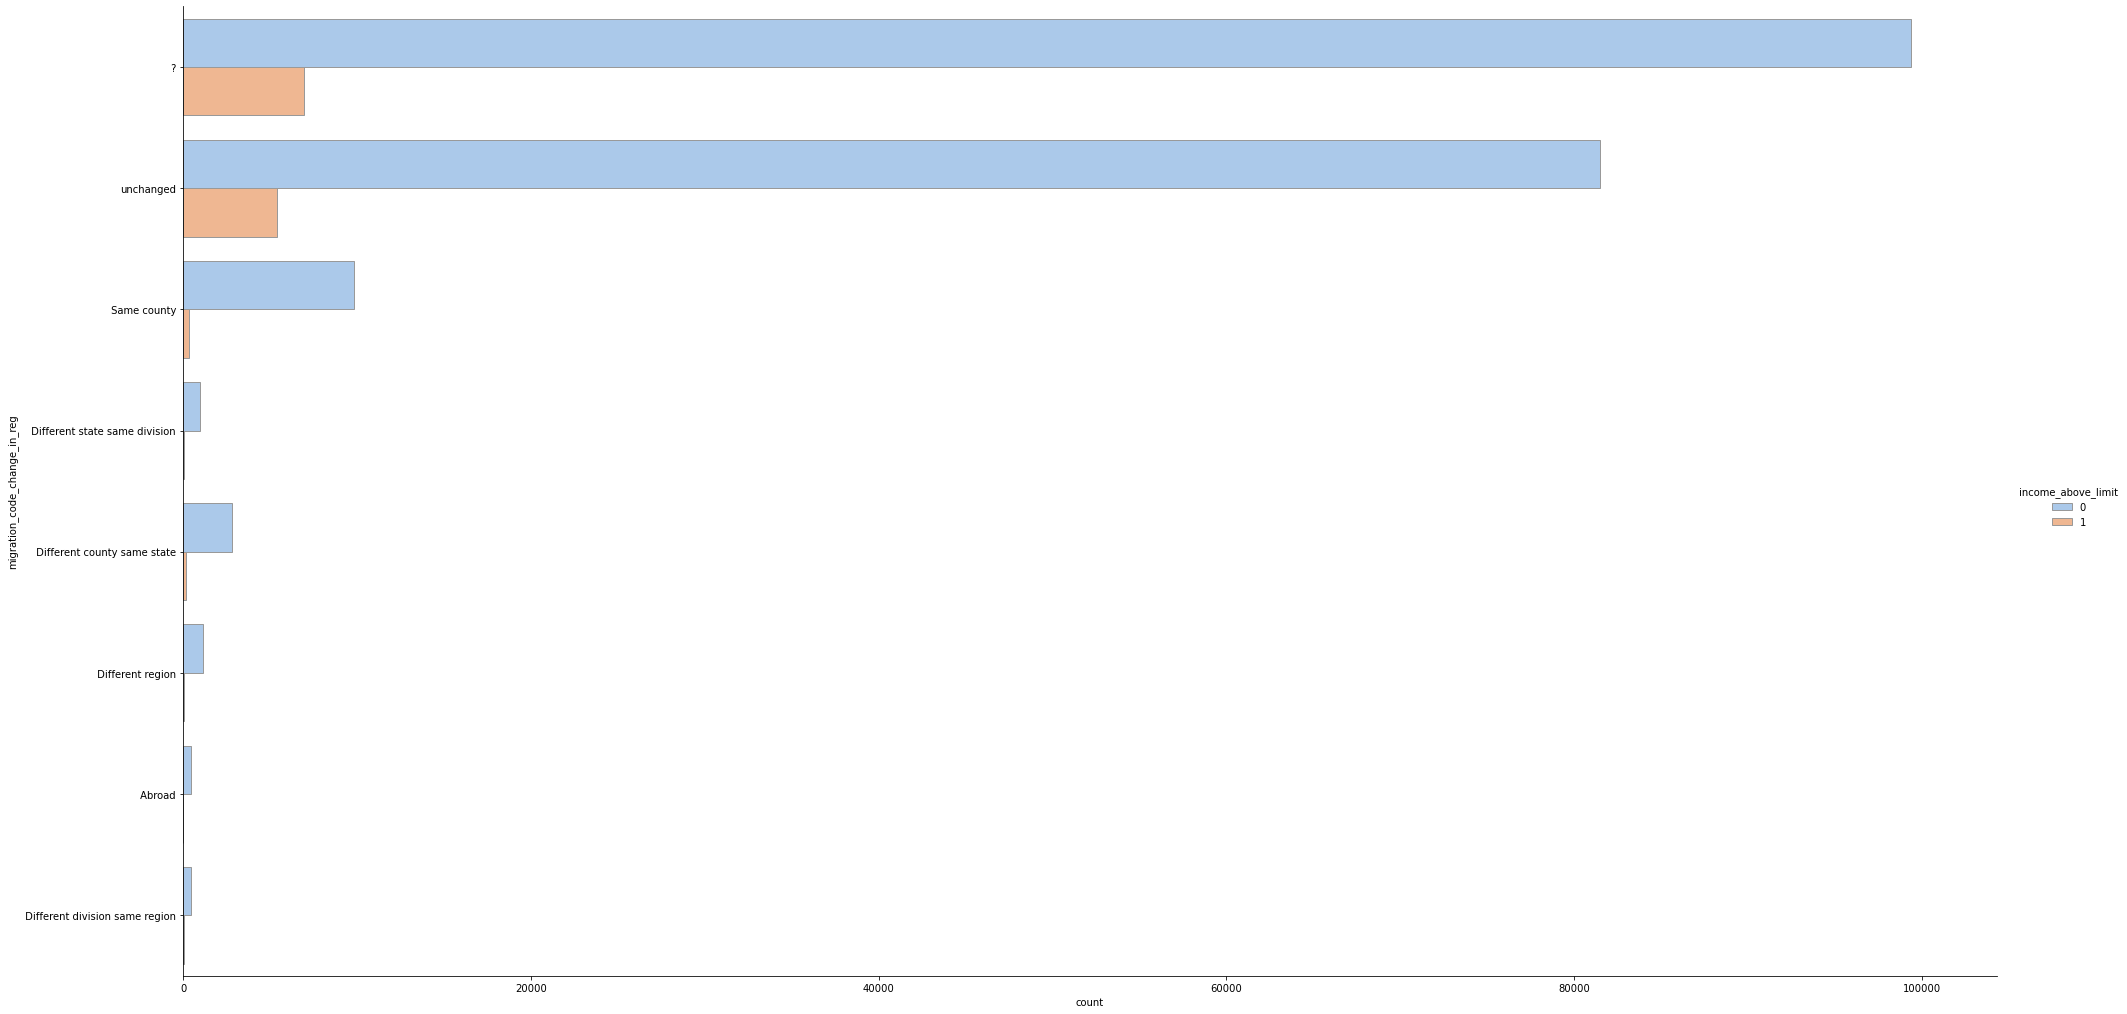

In [198]:
sns.catplot(data=train, y='migration_code_change_in_reg', hue='income_above_limit',
           kind="count", aspect=2,palette="pastel", edgecolor=".6", height=14)

In [199]:
col_name='migration_code_change_in_reg'
migration_code_change_in_reg_ratio_dc, migration_code_change_in_reg_enc_dc = prepare_dict(col_name)
print(migration_code_change_in_reg_enc_dc)

 Same county 0.03491565319733229
 Abroad 0.03614457831325301
 Different state same division 0.04616895874263261
 Different county same state 0.05023761031907671
 Different division same region 0.057494866529774126
 Different region 0.06053067993366501
unchanged 0.06212009578191195
 ? 0.06522148206691505
{' Same county': 1, ' Abroad': 2, ' Different state same division': 3, ' Different county same state': 4, ' Different division same region': 5, ' Different region': 6, 'unchanged': 7, ' ?': 8}


In [200]:
train['migration_code_change_in_reg']=train['migration_code_change_in_reg'].map(migration_code_change_in_reg_enc_dc)

In [201]:
test['migration_code_change_in_reg']=test['migration_code_change_in_reg'].map(migration_code_change_in_reg_enc_dc)

In [202]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,209499.0,34.518728,22.306738,0.00,15.00,33.00,50.00,90.0
education,209499.0,8.092282,4.756881,1.00,3.00,10.00,11.00,17.0
class,209499.0,3.839646,1.285217,1.00,3.00,3.00,4.00,9.0
marital_status,209499.0,4.472871,2.377923,1.00,2.00,4.00,7.00,7.0
race,209499.0,3.854744,0.537187,1.00,4.00,4.00,4.00,5.0
is_hispanic,209499.0,0.748739,2.060326,0.00,0.00,0.00,0.00,9.0
employment_commitment,209499.0,4.248879,1.783539,1.00,4.00,4.00,4.00,8.0
employment_stat,209499.0,0.176760,0.555562,0.00,0.00,0.00,0.00,2.0
wage_per_hour,209499.0,55.433487,276.757327,0.00,0.00,0.00,0.00,9999.0
working_week_per_year,209499.0,23.158850,24.397963,0.00,0.00,8.00,52.00,52.0


In [203]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
age,89786.0,34.586294,22.345868,0.00,15.000,33.000,50.000,90.0
education,89786.0,8.091473,4.746896,1.00,4.000,10.000,11.000,17.0
class,89786.0,3.836567,1.279826,1.00,3.000,3.000,4.000,9.0
marital_status,89786.0,4.471978,2.377682,1.00,2.000,4.000,7.000,7.0
race,89786.0,3.856771,0.537610,1.00,4.000,4.000,4.000,5.0
is_hispanic,89786.0,0.745517,2.056717,0.00,0.000,0.000,0.000,9.0
employment_commitment,89786.0,4.254461,1.784220,1.00,4.000,4.000,4.000,8.0
employment_stat,89786.0,0.175762,0.554491,0.00,0.000,0.000,0.000,2.0
wage_per_hour,89786.0,54.338627,265.197545,0.00,0.000,0.000,0.000,9400.0
working_week_per_year,89786.0,23.223932,24.418207,0.00,0.000,8.000,52.000,52.0


In [204]:
train.dtypes

age                                 int64
education                           int64
class                               int64
marital_status                      int64
race                                int64
is_hispanic                         int32
employment_commitment               int64
employment_stat                     int64
wage_per_hour                       int64
working_week_per_year               int64
industry_code                       int64
industry_code_main                  int64
occupation_code                     int64
occupation_code_main                int64
total_employed                      int64
household_stat                      int64
household_summary                   int64
vet_benefit                         int64
tax_status                          int64
gains                               int64
losses                              int64
stocks_status                       int64
citizenship                         int64
mig_year                          

In [205]:
test.dtypes

age                                 int64
education                           int64
class                               int64
marital_status                      int64
race                                int64
is_hispanic                         int32
employment_commitment               int64
employment_stat                     int64
wage_per_hour                       int64
working_week_per_year               int64
industry_code                       int64
industry_code_main                  int64
occupation_code                     int64
occupation_code_main                int64
total_employed                      int64
household_stat                      int64
household_summary                   int64
vet_benefit                         int64
tax_status                          int64
gains                               int64
losses                              int64
stocks_status                       int64
citizenship                         int64
mig_year                          

### Independant & dependant features

In [206]:
X = train.drop('income_above_limit', axis=1)
Y = train['income_above_limit']

print(X.shape, Y.shape)

(209499, 33) (209499,)


X.head()

In [207]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: income_above_limit, dtype: int64

#### Correlation

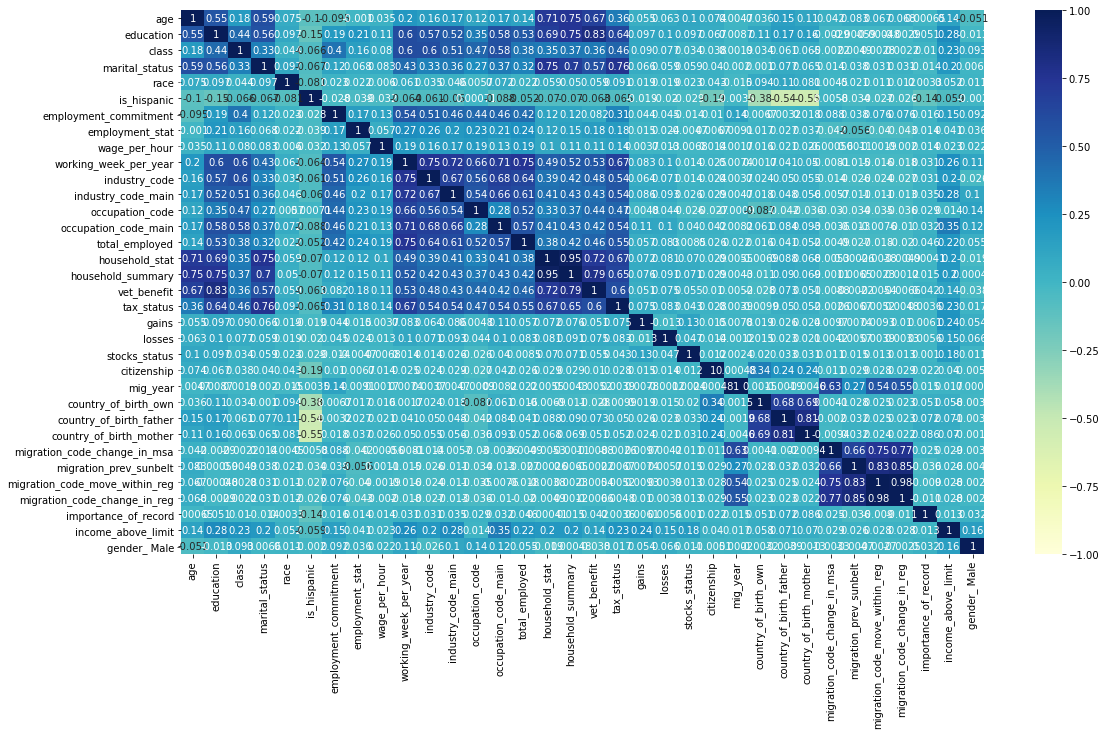

In [246]:
plt.figure(figsize=(18,10))
sns.heatmap(train.corr(), vmin=-1, vmax=+1, annot=True, cmap='YlGnBu')
plt.show()

### Train_Test Split

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=170218)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(146649, 33) (146649,)
(62850, 33) (62850,)


### Standard scaling 

In [209]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_train_std = pd.DataFrame(X_train_std, columns=X.columns)

In [210]:
X_test_std = sc.transform(X_test)
X_test_std = pd.DataFrame(X_test_std, columns=X.columns)

In [222]:
test_data_std = sc.transform(test)
test_data_std = pd.DataFrame(test_data_std, columns=test.columns)

In [223]:
test_data_std.head()

,age,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,...,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,importance_of_record,gender_ Male
0,0.873883,0.400210,0.123721,1.060894,0.270491,-0.361666,-0.140980,-0.318317,1.952212,0.933746,...,-0.998562,0.108441,0.146468,0.247422,-0.304656,0.273692,-0.096034,-0.081396,1.655977,1.040911
1,0.829029,-0.862347,0.123721,1.060894,0.270491,0.125820,1.541018,-0.318317,-0.200474,1.179587,...,1.001440,-3.611853,-3.417865,-3.550544,0.629921,0.273692,0.542403,0.547375,-0.565950,1.040911
2,0.335639,1.241914,0.123721,1.060894,0.270491,-0.361666,1.541018,1.480281,-0.200474,0.851799,...,1.001440,0.108441,0.146468,0.247422,0.629921,0.273692,0.542403,0.547375,3.172747,1.040911
3,-0.830558,-0.441494,-0.654806,-1.041514,0.270491,-0.361666,-0.140980,-0.318317,-0.200474,-0.623245,...,-0.998562,0.108441,0.146468,0.247422,-0.304656,0.273692,-0.096034,-0.081396,-0.351043,-0.960696
4,-0.830558,-0.441494,-0.654806,-1.041514,0.270491,-0.361666,-1.822977,-0.318317,-0.200474,-0.951032,...,1.001440,0.108441,0.146468,0.247422,0.629921,0.273692,0.542403,0.547375,0.193273,1.040911


### Fit Model

* Baseline model - Logistic regression

In [211]:
lr = LogisticRegression()
lr.fit(X_train_std, y_train)

print('Train accuracy is {}'.format(lr.score(X_train_std, y_train)))
print('Validation accuracy is {}'.format(lr.score(X_test_std, y_test)))

Train accuracy is 0.9507736159128258
Validation accuracy is 0.9524582338902148


In [212]:
f1_score(y_test, lr.predict(X_test_std))

0.4874785591766724

In [213]:
print(classification_report(y_test, lr.predict(X_test_std)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     59033
           1       0.71      0.37      0.49      3817

    accuracy                           0.95     62850
   macro avg       0.83      0.68      0.73     62850
weighted avg       0.95      0.95      0.95     62850



In [214]:
confusion_matrix(y_test, lr.predict(X_test_std))

array([[58441,   592],
       [ 2396,  1421]], dtype=int64)

In [215]:
tn, fp, fn, tp =  confusion_matrix(y_test, lr.predict(X_test_std)).ravel()
print('True negatives : {}'.format(tn))
print('False positives: {}'.format(fp))
print('False negatives: {}'.format(fn))
print('True positives : {}'.format(tp))

True negatives : 58441
False positives: 592
False negatives: 2396
True positives : 1421


* Logistic regression is not performing so well

* Baseline model - Random Forest

In [216]:
rf = RandomForestClassifier(n_estimators=250)
rf.fit(X_train_std, y_train)

print('Train accuracy is {}'.format(rf.score(X_train_std, y_train)))
print('Validation accuracy is {}'.format(rf.score(X_test_std, y_test)))

Train accuracy is 1.0
Validation accuracy is 0.9572633253778838


In [217]:
f1_score(y_test, rf.predict(X_test_std))

0.557350032959789

In [218]:
print(classification_report(y_test, rf.predict(X_test_std)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     59033
           1       0.75      0.44      0.56      3817

    accuracy                           0.96     62850
   macro avg       0.86      0.72      0.77     62850
weighted avg       0.95      0.96      0.95     62850



In [219]:
confusion_matrix(y_test, rf.predict(X_test_std))

array([[58473,   560],
       [ 2126,  1691]], dtype=int64)

In [220]:
tn, fp, fn, tp =  confusion_matrix(y_test, rf.predict(X_test_std)).ravel()
print('True negatives : {}'.format(tn))
print('False positives: {}'.format(fp))
print('False negatives: {}'.format(fn))
print('True positives : {}'.format(tp))

True negatives : 58473
False positives: 560
False negatives: 2126
True positives : 1691


* Random forest shows little imporvement than logistic regression

In [248]:
feature_imp  = rf.feature_importances_

ft = list(feature_imp)
cl = list(X.columns)

mapped = list(zip(ft, cl))

ft_imp_df = pd.DataFrame(mapped, columns=['Feature_imp_score', 'Feature_Name'])
ft_imp_df = ft_imp_df.sort_values('Feature_imp_score', ascending=False)

In [249]:
ft_imp_df

,Feature_imp_score,Feature_Name
31,0.094308,importance_of_record
0,0.090048,age
1,0.086133,education
21,0.082135,stocks_status
19,0.077173,gains
12,0.062195,occupation_code
13,0.061306,occupation_code_main
10,0.048312,industry_code
11,0.046464,industry_code_main
14,0.037559,total_employed


#### XGBoost

In [251]:
XGB = XGBClassifier()
XGB.fit(X_train_std, y_train)

print('Train accuracy is {}'.format(XGB.score(X_train_std, y_train)))
print('Validation accuracy is {}'.format(XGB.score(X_test_std, y_test)))

Train accuracy is 0.966723264393211
Validation accuracy is 0.9588385043754972


In [252]:
f1_score(y_test, XGB.predict(X_test_std))

0.5915048160429496

In [253]:
print(classification_report(y_test, XGB.predict(X_test_std)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     59033
           1       0.74      0.49      0.59      3817

    accuracy                           0.96     62850
   macro avg       0.86      0.74      0.78     62850
weighted avg       0.95      0.96      0.95     62850



In [254]:
confusion_matrix(y_test, XGB.predict(X_test_std))

array([[58390,   643],
       [ 1944,  1873]], dtype=int64)

### Gradient boosting

In [357]:
def modelfit(alg, dtrain, dtest, predictors, performCV=True, printfeatureimportance=True, cv_folds=5):
    
    #Fit algorithm on the data
    alg.fit(dtrain[predictors], y_train)
    
    #predict the training set
    dtrain_predictions=alg.predict(dtrain[predictors])
    dtrain_predprob=alg.predict_proba(train[predictors])[:,1]
    
    #perform cross validation
    if performCV:
        cv_score=cross_val_score(alg, dtrain[predictors], y_train, cv=cv_folds, scoring='f1')
        
    #print model report
    print('\nModel Report')
    print("Train f1 score : %.4g" %f1_score(y_train, dtrain_predictions))
    print("Test f1 score : %.4g" %f1_score(y_test, alg.predict(dtest[predictors])))
    
    if performCV:
        print("CV Score: Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" %(np.mean(cv_score), np.std(cv_score), np.min(cv_score), np.max(cv_score)))
        
    #print feature importance
    if printfeatureimportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
        
    return alg


Model Report
f1 score : 0.562
CV Score: Mean - 0.5504658 | Std - 0.01015521 | Min - 0.5377747 | Max - 0.564242


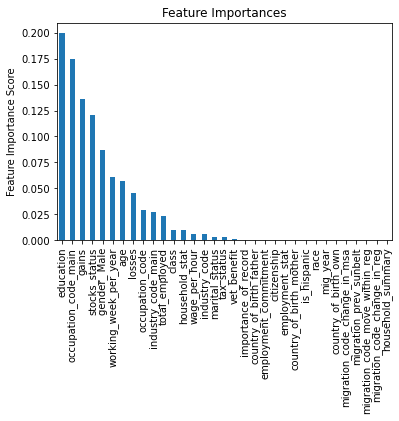

In [272]:
#Choose all predictors except target & IDcols

predictors = [col for col in X_train.columns]# if col not in [target, IDcol]]
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, X_train, X_test, predictors)

In [273]:
train.shape

(209499, 34)

In [275]:
(209499*0.5)/100

1047.495

<b> Step 1 </b>- Find the number of estimators for a high learning rate <br>
We will use the following benchmarks for parameters: <br>

min_samples_split = 1000 : ~0.5-1% of total values. Since this is imbalanced class problem, we'll take small value <br>
min_samples_leaf = 50 : Just using for preventing overfitting. will be tuned later. <br>
max_depth = 20 : since high number of observations and predictors, choose relatively high value <br>
max_features = 'sqrt' : general thumbrule to start with <br>
subsample = 0.8 : typically used value (will be tuned later) <br>

0.1 is assumed to be a good learning rate to start with. Let's try to find the optimum number of estimators requried for this. <br>

In [285]:
#Choose all predictors except target & IDcols
predictors = [col for col in X_train.columns] #if x not in [target, IDcol]]

#define 20 to 80 trees
param_test1 = {'n_estimators':range(100,150,10)}

gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=1000,min_samples_leaf=50,max_depth=20,max_features='sqrt',subsample=0.8,random_state=1702), 
param_grid = param_test1, scoring='f1',n_jobs=4, cv=5)

gsearch1.fit(X_train[predictors],y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=20,
                                                  max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  min_samples_split=1000,
                                                  random_state=1702,
                                                  subsample=0.8),
             n_jobs=4, param_grid={'n_estimators': range(100, 150, 10)},
             scoring='f1')

In [286]:
gsearch1.best_score_, gsearch1.best_params_, gsearch1.best_score_

(0.5862235166931449, {'n_estimators': 140}, 0.5862235166931449)

#### Step 2- Tune tree-specific parameters

Now, lets move onto tuning the tree parameters. We will do this in 2 stages: <br>

Tune max_depth and num_samples_split <br>
Tune min_samples_leaf <br>
Tune max_features <br>

In [287]:
#Grid seach on subsample and max_features

param_test2 = {'max_depth':range(10,20,2), 'min_samples_split':range(400,1600,200)}


gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=140,
                                                max_features='sqrt', subsample=0.8, random_state=1702), 
                       param_grid = param_test2, scoring='f1',n_jobs=4, cv=5)

gsearch2.fit(X_train[predictors],y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_features='sqrt',
                                                  n_estimators=140,
                                                  random_state=1702,
                                                  subsample=0.8),
             n_jobs=4,
             param_grid={'max_depth': range(10, 20, 2),
                         'min_samples_split': range(400, 1600, 200)},
             scoring='f1')

In [288]:
gsearch2.best_score_, gsearch2.best_params_, gsearch2.best_score_

(0.5929592950710398,
 {'max_depth': 16, 'min_samples_split': 800},
 0.5929592950710398)

In [289]:
#Grid seach on min_samples_leaf

param_test3 = {'min_samples_leaf':range(30,90,10)}

gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=140,max_depth=16,
                                                    max_features='sqrt', min_samples_split=800,
                                                    subsample=0.8, random_state=1702), 
                                                    param_grid = param_test3, scoring='f1',n_jobs=4, cv=5)
gsearch3.fit(X_train[predictors],y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=16,
                                                  max_features='sqrt',
                                                  min_samples_split=800,
                                                  n_estimators=140,
                                                  random_state=1702,
                                                  subsample=0.8),
             n_jobs=4, param_grid={'min_samples_leaf': range(30, 90, 10)},
             scoring='f1')

In [290]:
gsearch3.best_score_, gsearch3.best_params_, gsearch3.best_score_

(0.5879229106065582, {'min_samples_leaf': 80}, 0.5879229106065582)

In [291]:
gsearch3.best_estimator_

GradientBoostingClassifier(max_depth=16, max_features='sqrt',
                           min_samples_leaf=80, min_samples_split=800,
                           n_estimators=140, random_state=1702, subsample=0.8)


Model Report
f1 score : 0.6721
CV Score: Mean - 0.5879229 | Std - 0.006623057 | Min - 0.5801123 | Max - 0.5969069


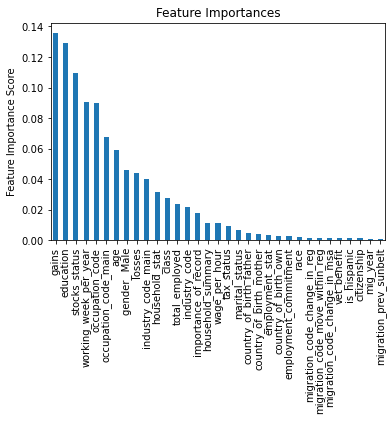

In [294]:
gbm = modelfit(gsearch3.best_estimator_, X_train, X_test, predictors)

#### Tune max_features:

In [300]:
#Grid seach on subsample and max_features
param_test4 = {'max_features':range(18,25,2)}

gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(max_depth=16, max_features='sqrt',
                           min_samples_leaf=80, min_samples_split=800,
                           n_estimators=140, random_state=1702, subsample=0.8),
                           param_grid = param_test4, scoring='f1',n_jobs=4, cv=5)
                        
gsearch4.fit(X_train[predictors],y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=16,
                                                  max_features='sqrt',
                                                  min_samples_leaf=80,
                                                  min_samples_split=800,
                                                  n_estimators=140,
                                                  random_state=1702,
                                                  subsample=0.8),
             n_jobs=4, param_grid={'max_features': range(18, 25, 2)},
             scoring='f1')

In [301]:
gsearch4.best_score_, gsearch4.best_params_, gsearch4.best_score_

(0.5942507988253697, {'max_features': 20}, 0.5942507988253697)

#### Step3- Tune Subsample and Lower Learning Rate

In [307]:
#Grid seach on subsample
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}

gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, max_depth=16, 
                           min_samples_leaf=80, min_samples_split=800, max_features=20,
                           n_estimators=140, random_state=1702, subsample=0.8),
                           param_grid = param_test5, scoring='f1',n_jobs=4, cv=5)

gsearch5.fit(X_train[predictors],y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=16, max_features=20,
                                                  min_samples_leaf=80,
                                                  min_samples_split=800,
                                                  n_estimators=140,
                                                  random_state=1702,
                                                  subsample=0.8),
             n_jobs=4,
             param_grid={'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9]},
             scoring='f1')

In [308]:
gsearch5.best_score_, gsearch5.best_params_, gsearch5.best_score_

(0.5942507988253697, {'subsample': 0.8}, 0.5942507988253697)

* With all tuned lets try reducing the learning rate and proportionally increasing the number of estimators to get more robust results:


Model Report
f1 score : 0.6695
CV Score: Mean - 0.5942508 | Std - 0.008457676 | Min - 0.5787909 | Max - 0.6023217


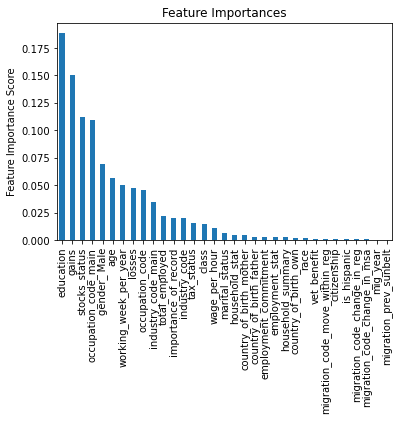

In [309]:
gbm_tuned1 = GradientBoostingClassifier(learning_rate=0.1, max_depth=16, 
                           min_samples_leaf=80, min_samples_split=800, max_features=20,
                           n_estimators=140, random_state=1702, subsample=0.8)

gbm = modelfit(gbm_tuned1, X_train, X_test, predictors)


Model Report
Train f1 score : 0.6541
Test f1 score : 0.5925
CV Score: Mean - 0.5911118 | Std - 0.008626993 | Min - 0.5802798 | Max - 0.6019868


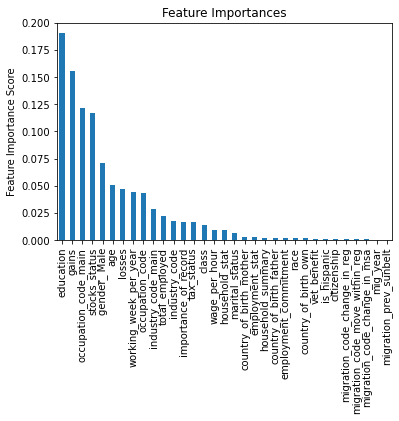

In [312]:
gbm_tuned2 = GradientBoostingClassifier(learning_rate=0.05, max_depth=16, 
                           min_samples_leaf=80, min_samples_split=800, max_features=20,
                           n_estimators=200, random_state=1702, subsample=0.8)

gbm = modelfit(gbm_tuned2, X_train, X_test, predictors)


Model Report
Train f1 score : 0.616
Test f1 score : 0.5805
CV Score: Mean - 0.5755258 | Std - 0.005280419 | Min - 0.5677767 | Max - 0.5831636


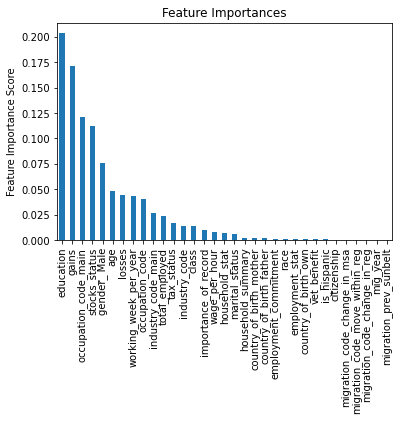

In [315]:
gbm_tuned3 = GradientBoostingClassifier(learning_rate=0.01, max_depth=16, 
                           min_samples_leaf=80, min_samples_split=800, max_features=20,
                           n_estimators=500, random_state=1702, subsample=0.8)

gbm = modelfit(gbm_tuned3, X_train, X_test, predictors)

#### XGBoost

In [339]:
def modelfit(alg, dtrain, dtest, predictors, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=y_train.values)
        xgtest  = xgb.DMatrix(dtest[predictors])
        
        cvresults = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                          metrics='auc', early_stopping_rounds=early_stopping_rounds)
        print(cvresults)
        alg.set_params(n_estimators=cvresults.shape[0])
        
    #Fit algorithm on data
    alg.fit(dtrain[predictors], y_train,eval_metric='auc')
    
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Print model report:
    print("\nModel Report")
    print("Train")
    print("Accuracy : %.4g" % f1_score(y_train.values, dtrain_predictions))
    print("AUC Score (Train): %f" % roc_auc_score(y_train.values, dtrain_predprob))
    
    
    print("Test")
    print("Accuracy : %.4g" % f1_score(y_test.values, alg.predict(dtest[predictors])))
    print("AUC Score (Train): %f" % roc_auc_score(y_test.values, alg.predict_proba(dtest[predictors])[:,1]))
                                                    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')  
    
    return alg

### Step 1- Find the number of estimators for a high learning rate

[20:05:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "enable_categorical", "missing", "n_estimators", "use_label_encoder" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:05:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "enable_categorical", "missing", "n_estimators", "use_label_encoder" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:05:38] WARNING: C:/Users/Administrator/workspa

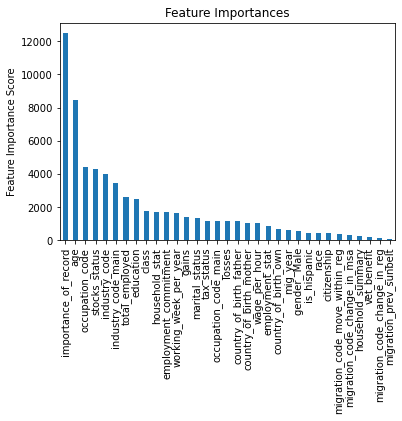

In [340]:
predictors = [x for x in X_train.columns] #if x not in [target, IDcol]]
xgb1 = XGBClassifier(
        learning_rate =0.1,
        n_estimators=100,
        max_depth=15,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27)
xgb_model = modelfit(xgb1, X_train, X_test, predictors)

In [341]:
test_predictions=xgb_model.predict(test)
print(test_predictions)

submission = pd.read_csv('Data/SampleSubmission.csv')
submission['income_above_limit'] = test_predictions
print(submission.head())

submission.to_csv('xgb_submission.csv', index=False)

[0 0 1 ... 0 0 0]
            ID  income_above_limit
0  ID_TZ209499                   0
1  ID_TZ209500                   0
2  ID_TZ209501                   1
3  ID_TZ209502                   0
4  ID_TZ209503                   0


In [ ]:
'''
#Grid seach on subsample and max_features
#Choose all predictors except target & IDcols
param_test1 = {
    'max_depth':range(3,20,3),
    'min_child_weight':range(1,10,2)
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=16,
                                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
                       param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)

gsearch1.fit(X_train[predictors],y_train)
'''

In [ ]:
#gsearch1.best_score_, gsearch1.best_params_, gsearch1.best_score_

[20:35:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "enable_categorical", "missing", "n_estimators", "use_label_encoder" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:35:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "enable_categorical", "missing", "n_estimators", "use_label_encoder" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:35:35] WARNING: C:/Users/Administrator/workspa

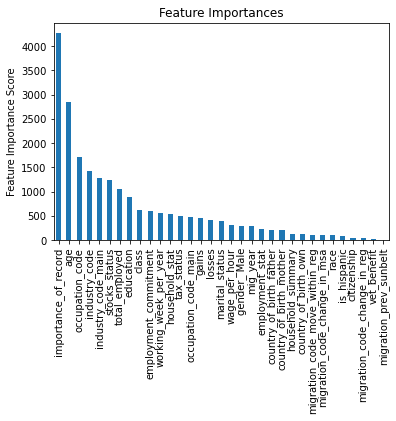

In [343]:
predictors = [x for x in X_train.columns] #if x not in [target, IDcol]]
xgb1 = XGBClassifier(
        learning_rate =0.1,
        n_estimators=150,
        max_depth=16,
        min_child_weight=8,
        gamma=0,
        reg_alpha=0.005,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27)
xgb_model = modelfit(xgb1, X_train, X_test, predictors)

In [344]:
test_predictions=xgb_model.predict(test)
print(test_predictions)

submission = pd.read_csv('Data/SampleSubmission.csv')
submission['income_above_limit'] = test_predictions
print(submission.head())

submission.to_csv('xgb_submission.csv', index=False)

[0 0 1 ... 0 0 0]
            ID  income_above_limit
0  ID_TZ209499                   0
1  ID_TZ209500                   0
2  ID_TZ209501                   1
3  ID_TZ209502                   0
4  ID_TZ209503                   0


#### Inference for test data points

In [241]:
def inference(model):
    test_predictions = model.predict(test_data_std)
    print(test_predictions)
    
    submission = pd.read_csv('Data/SampleSubmission.csv')
    submission['income_above_limit'] = test_predictions
    print(submission.head())
    
    submission.to_csv('submission.csv', index=False)

In [242]:
inference(rf)

[0 0 1 ... 0 0 0]
            ID  income_above_limit
0  ID_TZ209499                   0
1  ID_TZ209500                   0
2  ID_TZ209501                   1
3  ID_TZ209502                   0
4  ID_TZ209503                   0
